#**To be done**
* Description of Dataset, features of it, include images in the report for test's or whatever being made.
* Data Preprocessing.
* Data Visualization.
* Meaningfull Insights
* Perform Statistical tests on Hypothesis made, i.e perform Hypothesis testing using statistics.

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plot

# **Description of Dataset and it's features.**


* The data set choosen is a training dataset which has 35000 rows and 20 columns, i.e, 35000 different values for the 20 features. The data set is basically about the travelling distance of a taxi and fare being collected for each trip.

##**Data Description :-**
###**Trip_distance :-**
* The elapsed trip distance in miles reported by the taximeter.

###**Rate_code :-**
* The final rate code is in effect at the end of the trip.

* 1= Standard rate,2=JFK,3=Newark, 4=Nassau or Westchester, 5=Negotiated fare,6=Group ride

###**Storeandfwd_flag :-**
* This flag indicates whether the trip record was held in vehicle memory before sending it to the vendor and determines if the trip was stored in the server and forwarded to the vendor.

* **Y** = store and forward trip
* **N** = not a store and forward trip.

###**Payment_type :-**
* A numeric code signifying how the passenger paid for the trip.

* **1** = Credit card, **2** = Cash,  **3** = No charge, **4** = Dispute, **5**= Unknown, **6** = Voided trip

###**Fare_amount :-**
* The time-and-distance fare calculated by the meter

###**Extra :-**
* Miscellaneous extras and surcharges.

###**Mta_tax :-**
* $0.50 MTA tax that is automatically triggered based on the metered rate in use.

###**Trip_amount :-**
* Tip amount credited to the driver for credit card transactions.

###**Tolls_amount :-**
* Total amount of all tolls paid in the trip.

###**Imp_surcharge :-**
* $0.30 extra charges added automatically to all rides

###**Total_amount :-**
* The total amount charged to passengers. Does not include cash tips.

###**Pickup_location_id :-**
* TLC Taxi Zone in which the taximeter was engaged.

###**Dropoff_location_id :-**
* TLC Taxi Zone in which the taximeter was disengaged.

###**Year :-**
* The year in which the taxi trip was taken.

###**Month :-**
* The month on which the taxi trip was taken.

###**Day :-**
* The day on whioch the taxi trip was taken.

###**Day_of_week :-**
* The day of the week on which the taxi trip was taken.

###**Hour_of_day :-**
* Used to determine the hour of the day in 24 hours format.

###**Trip_duration :-**
* The total duration of the trip in seconds.

###**calculated_total_amount :-**
* The total amount the customer has to pay for the taxi.


In [105]:
# Loading the dataset into a dataframe.
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MDSC-102/final lab/train.csv')
train_df

trip_distance  rate_code store_and_fwd_flag  payment_type  fare_amount  \
0               9.01        NaN                  N           1.0         26.0   
1               0.20        1.0                NaN           1.0          NaN   
2               9.65        1.0                  N           1.0          NaN   
3                NaN        NaN                  N           1.0         30.0   
4               5.80        1.0                  N           1.0         21.5   
...              ...        ...                ...           ...          ...   
34995            NaN        1.0                  N           1.0         59.5   
34996            NaN        NaN                  N           1.0         30.0   
34997           6.78        1.0                NaN           1.0         23.0   
34998           0.26        1.0                NaN           2.0          3.0   
34999          18.40        NaN                NaN           1.0         53.0   

       extra  mta_tax  tip_amount  tolls_amount  imp_surcharge  total_amount  \
0        0.0      0.5        8.14          5.76            0.3         40.70   
1        0.0      0.5        0.75          0.00            0.3          4.55   
2        NaN      0.5        9.61          5.76            0.3         57.67   
3        0.5      0.5        9.25          5.76            0.3         46.31   
4        NaN      0.5        4.56          0.00            NaN         27.36   
...      ...      ...         ...           ...            ...           ...   
34995    0.5      NaN       10.00          5.76            0.3           NaN   
34996    0.0      0.5        6.58          5.76            NaN         43.14   
34997    0.0      0.5        5.95          0.00            0.3           NaN   
34998    0.0      0.5        0.00           NaN            NaN           NaN   
34999    1.0      0.5       10.96          0.00            0.3         65.76   

       pickup_location_id  dropoff_location_id    year  month   day  \
0                   262.0                138.0  2018.0    3.0   7.0   
1                   263.0                236.0  2018.0    2.0  25.0   
2                   138.0                  NaN  2018.0    1.0  29.0   
3                   186.0                138.0  2018.0    9.0  25.0   
4                   162.0                  NaN  2018.0    8.0  20.0   
...                   ...                  ...     ...    ...   ...   
34995               132.0                259.0  2018.0    NaN  23.0   
34996                24.0                138.0  2018.0    4.0   4.0   
34997               140.0                231.0  2018.0    3.0   7.0   
34998               142.0                142.0     NaN    4.0  18.0   
34999               132.0                 66.0  2018.0    6.0   5.0   

       day_of_week  hour_of_day  trip_duration  calculated_total_amount  
0              2.0          6.0         2131.0                    24.30  
1              6.0         10.0         2377.0                    37.40  
2              0.0          8.0         1286.0                    30.36  
3              1.0         20.0            NaN                     4.30  
4              0.0          NaN         1575.0                      NaN  
...            ...          ...            ...                      ...  
34995          2.0          NaN         2998.0                    29.76  
34996          2.0          NaN            NaN                    29.15  
34997          NaN          8.0            NaN                    42.67  
34998          2.0          8.0         1932.0                    26.73  
34999          NaN         18.0            NaN                    62.80  

[35000 rows x 20 columns]

In [51]:
null_count = train_df.isnull().sum()
null_count

trip_distance              6375
rate_code                  6372
store_and_fwd_flag         6363
payment_type               6252
fare_amount                6301
extra                      6258
mta_tax                    6296
tip_amount                 6367
tolls_amount               6398
imp_surcharge              6334
total_amount               6295
pickup_location_id         6461
dropoff_location_id        6311
year                       6478
month                      6375
day                        6381
day_of_week                6212
hour_of_day                6436
trip_duration              6367
calculated_total_amount    6400
dtype: int64

#**Data Preprocessing**
* Checking for null values.
* Replacing null values with mean or mode.
* Replacing the object value i.e Y/N with 1/0, hence converting the dtype to int64.

In [79]:
null_columns = train_df.columns[train_df.isnull().any()]
null_columns

Index(['trip_distance', 'rate_code', 'store_and_fwd_flag', 'payment_type',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'imp_surcharge', 'total_amount', 'pickup_location_id',
       'dropoff_location_id', 'year', 'month', 'day', 'day_of_week',
       'hour_of_day', 'trip_duration', 'calculated_total_amount'],
      dtype='object')

In [53]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35000 entries, 0 to 34999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   trip_distance            28625 non-null  float64
 1   rate_code                28628 non-null  float64
 2   store_and_fwd_flag       28637 non-null  object 
 3   payment_type             28748 non-null  float64
 4   fare_amount              28699 non-null  float64
 5   extra                    28742 non-null  float64
 6   mta_tax                  28704 non-null  float64
 7   tip_amount               28633 non-null  float64
 8   tolls_amount             28602 non-null  float64
 9   imp_surcharge            28666 non-null  float64
 10  total_amount             28705 non-null  float64
 11  pickup_location_id       28539 non-null  float64
 12  dropoff_location_id      28689 non-null  float64
 13  year                     28522 non-null  float64
 14  month                 

In [106]:
for column in null_columns:
  if train_df[column].dtype == 'float64':
    train_df[column].fillna(train_df[column].mode()[0], inplace = True)
  elif train_df[column].dtype == 'object':
    train_df[column].fillna(train_df[column].mode()[0], inplace = True)

In [63]:
null_count = train_df.isnull().sum()
print(null_count)
train_df.info()

trip_distance              0
rate_code                  0
store_and_fwd_flag         0
payment_type               0
fare_amount                0
extra                      0
mta_tax                    0
tip_amount                 0
tolls_amount               0
imp_surcharge              0
total_amount               0
pickup_location_id         0
dropoff_location_id        0
year                       0
month                      0
day                        0
day_of_week                0
hour_of_day                0
trip_duration              0
calculated_total_amount    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35000 entries, 0 to 34999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   trip_distance            35000 non-null  float64
 1   rate_code                35000 non-null  float64
 2   store_and_fwd_flag       35000 non-null  object 
 3   payment_type           

In [107]:
for element in train_df['store_and_fwd_flag']:
  if element == 'Y' or element =='y':
    train_df['store_and_fwd_flag'].replace('Y',1.0, inplace = True)

  else:
    train_df['store_and_fwd_flag'].replace('N',0.0, inplace = True)

In [57]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35000 entries, 0 to 34999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   trip_distance            35000 non-null  float64
 1   rate_code                35000 non-null  float64
 2   store_and_fwd_flag       35000 non-null  float64
 3   payment_type             35000 non-null  float64
 4   fare_amount              35000 non-null  float64
 5   extra                    35000 non-null  float64
 6   mta_tax                  35000 non-null  float64
 7   tip_amount               35000 non-null  float64
 8   tolls_amount             35000 non-null  float64
 9   imp_surcharge            35000 non-null  float64
 10  total_amount             35000 non-null  float64
 11  pickup_location_id       35000 non-null  float64
 12  dropoff_location_id      35000 non-null  float64
 13  year                     35000 non-null  float64
 14  month                 

#**Data Visualization :-**
* Trying to plot as many plots as possible and trying to get the inference from it.

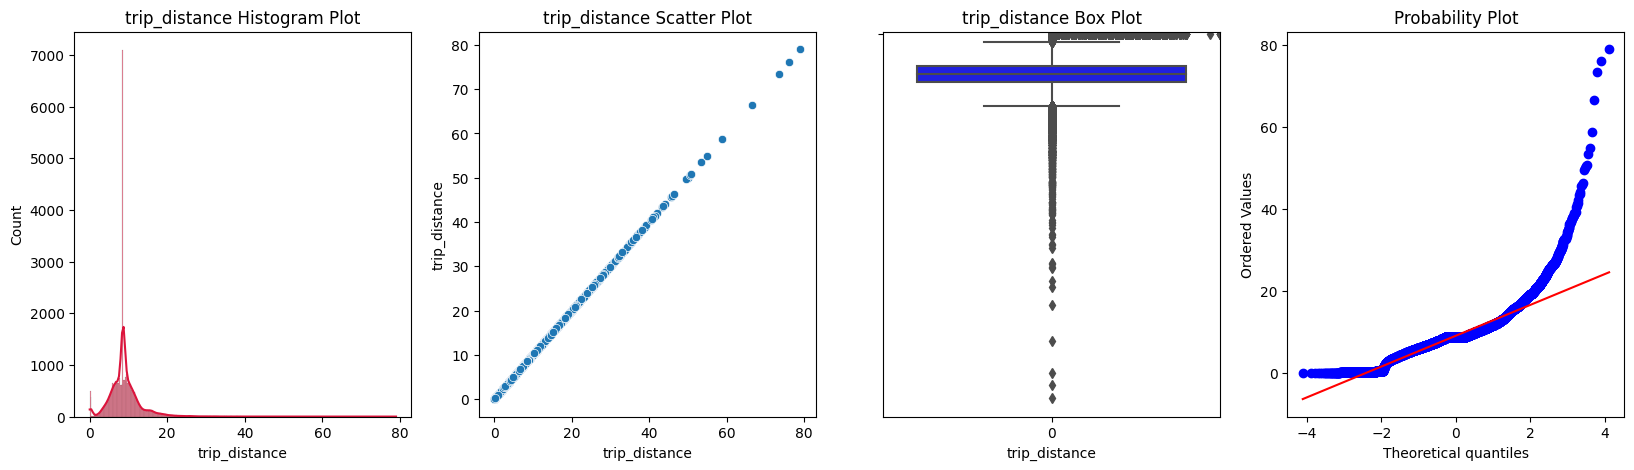

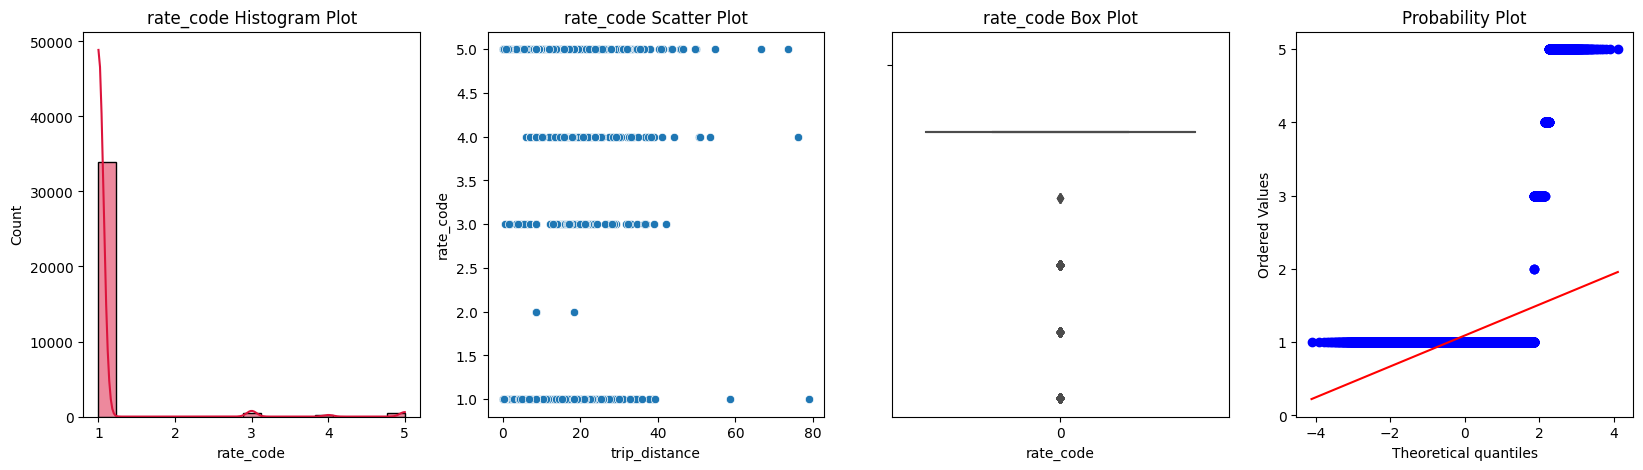

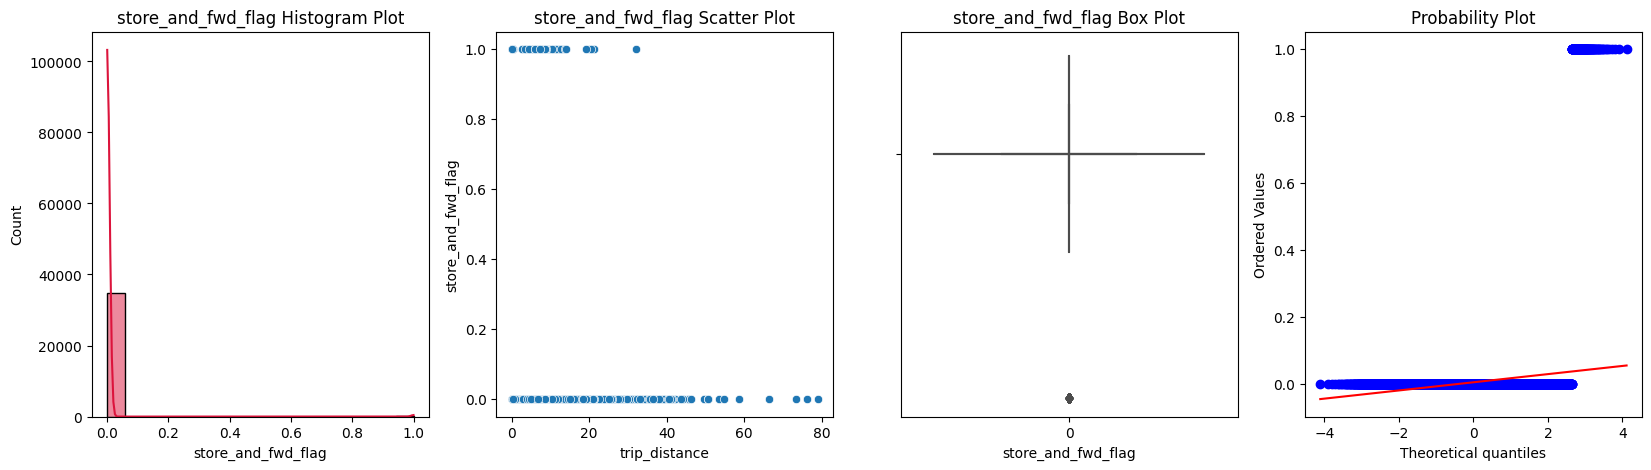

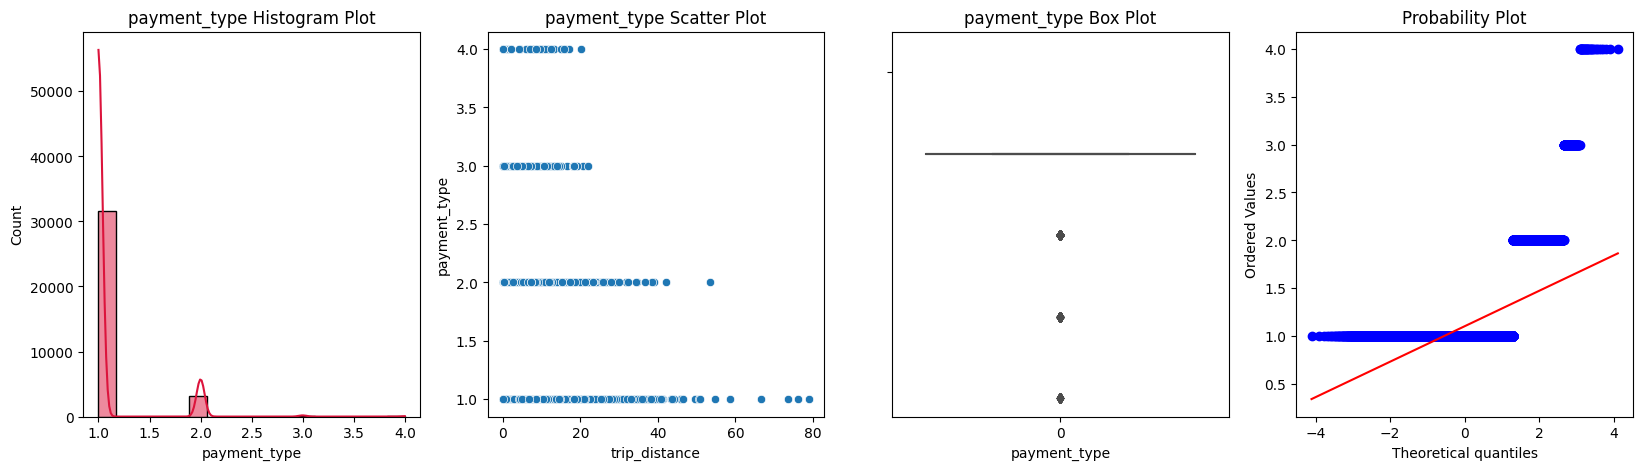

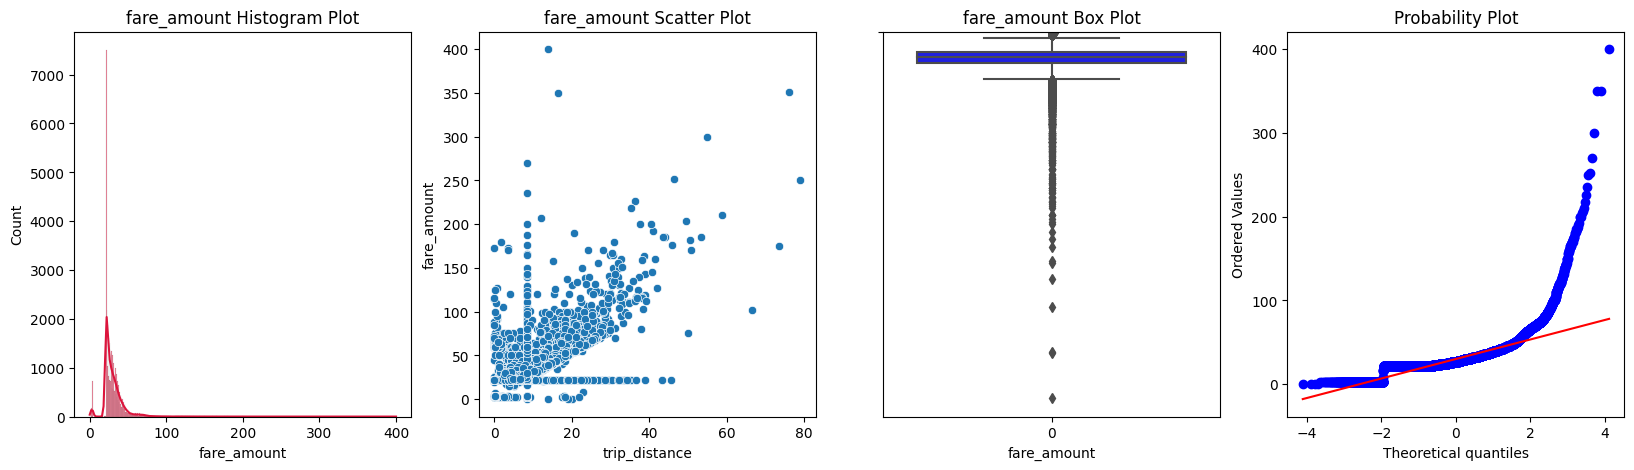

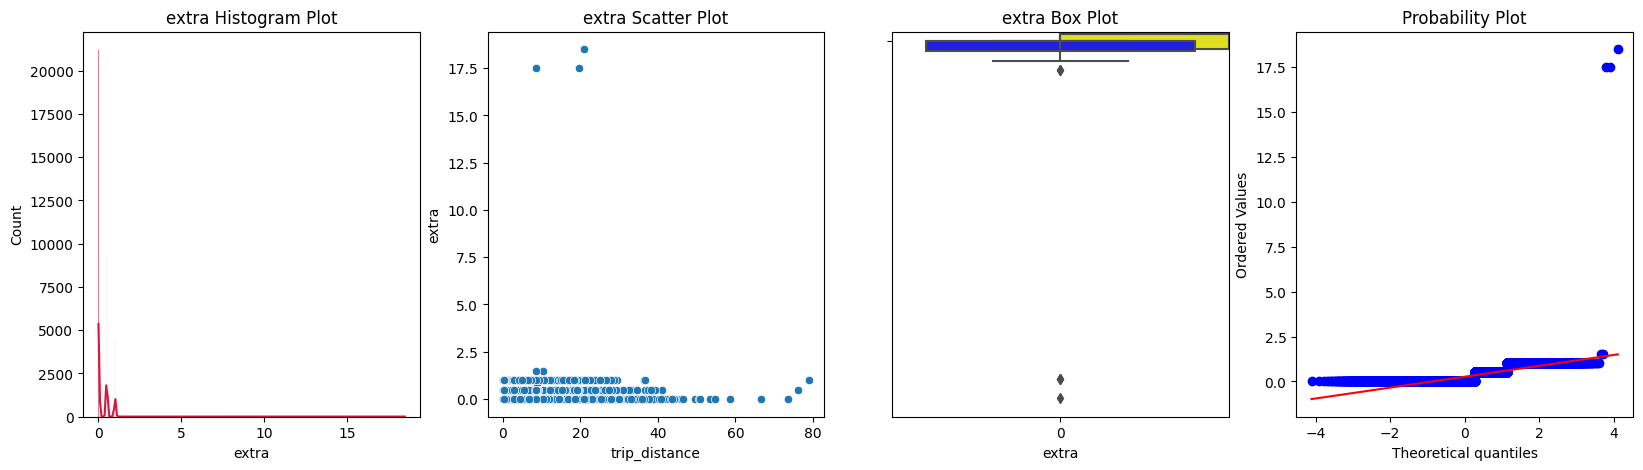

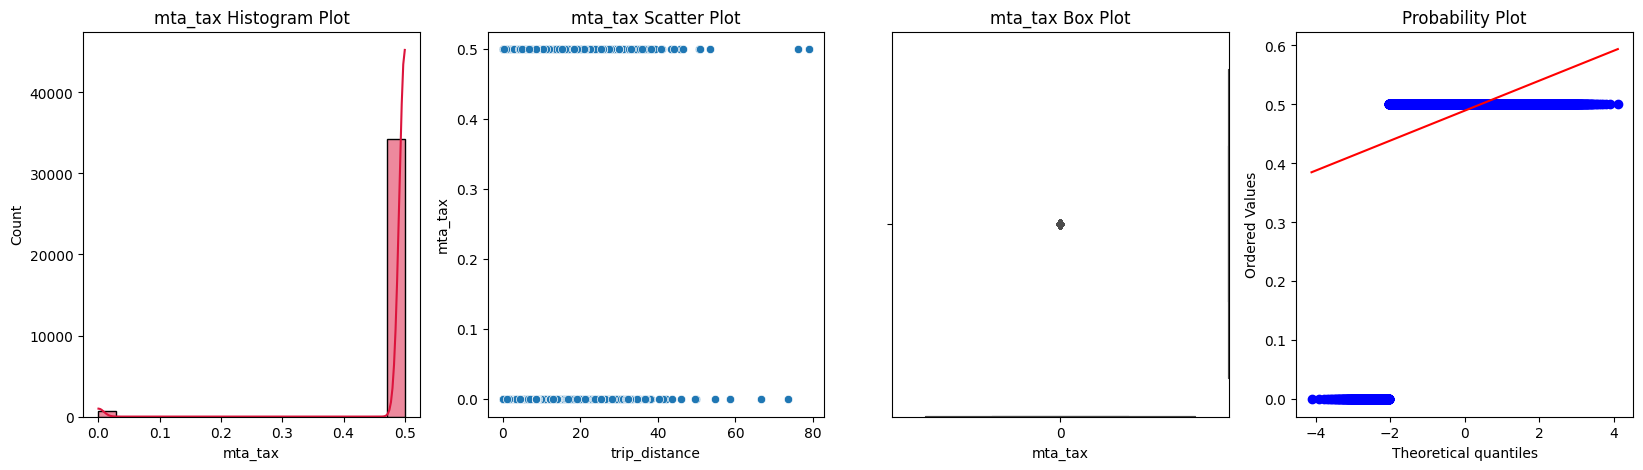

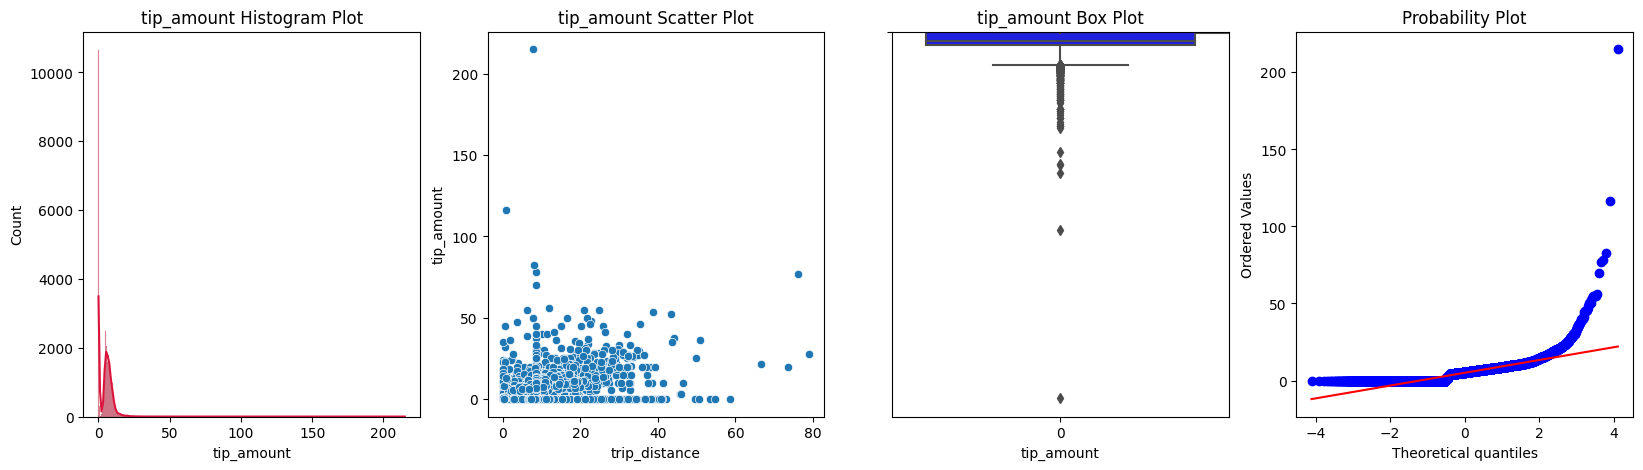

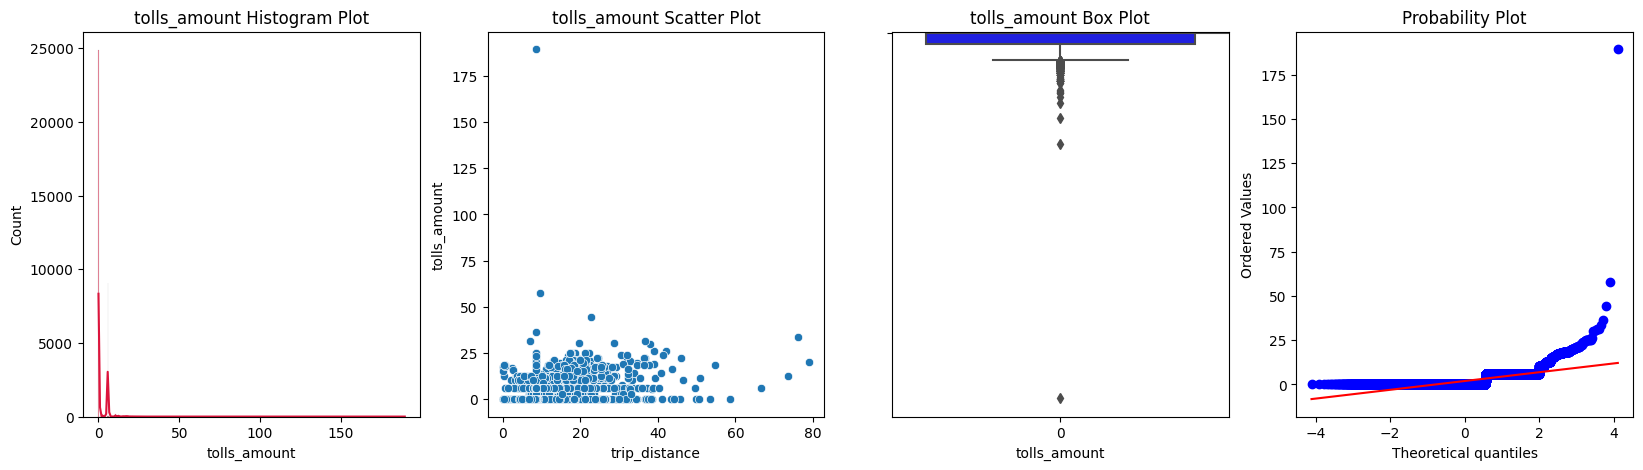

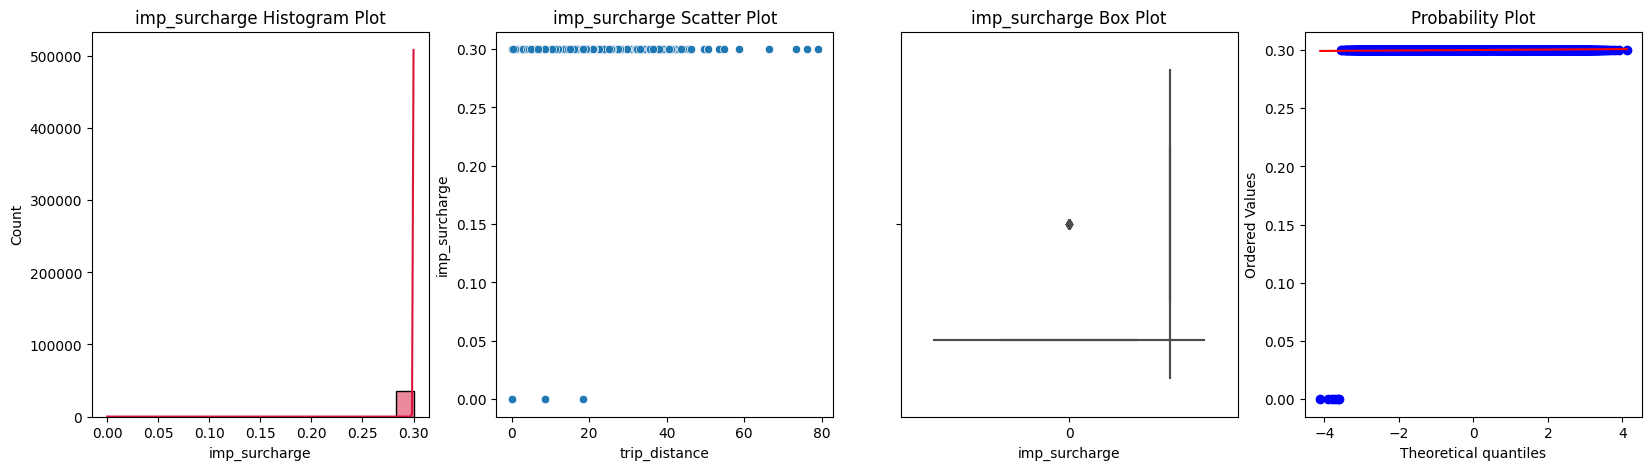

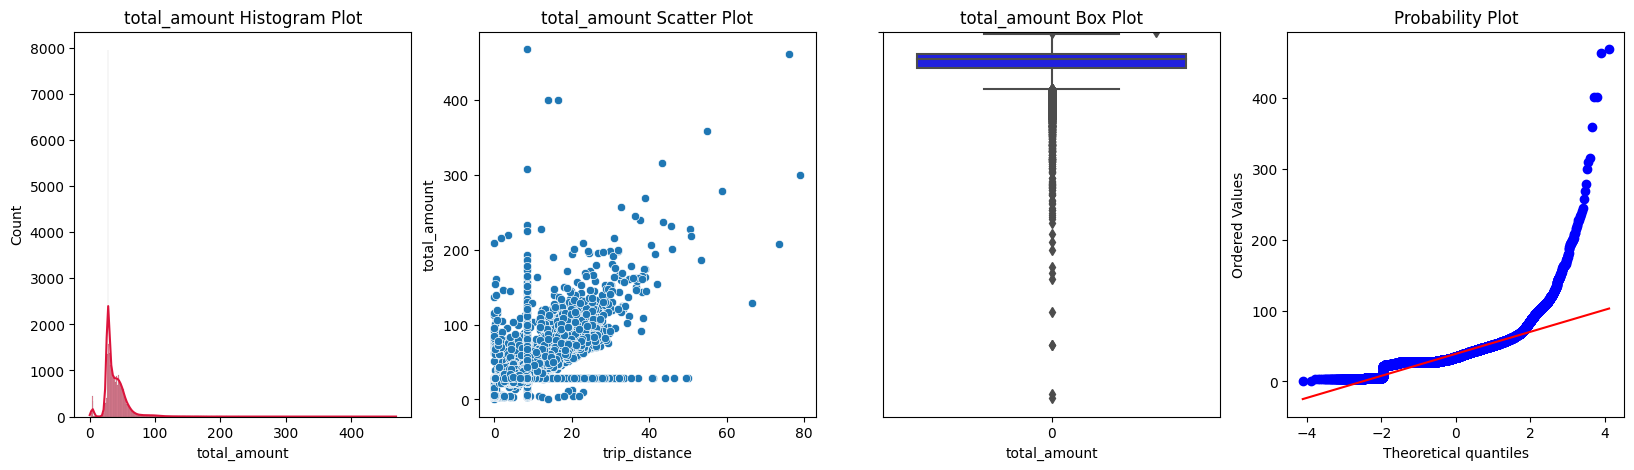

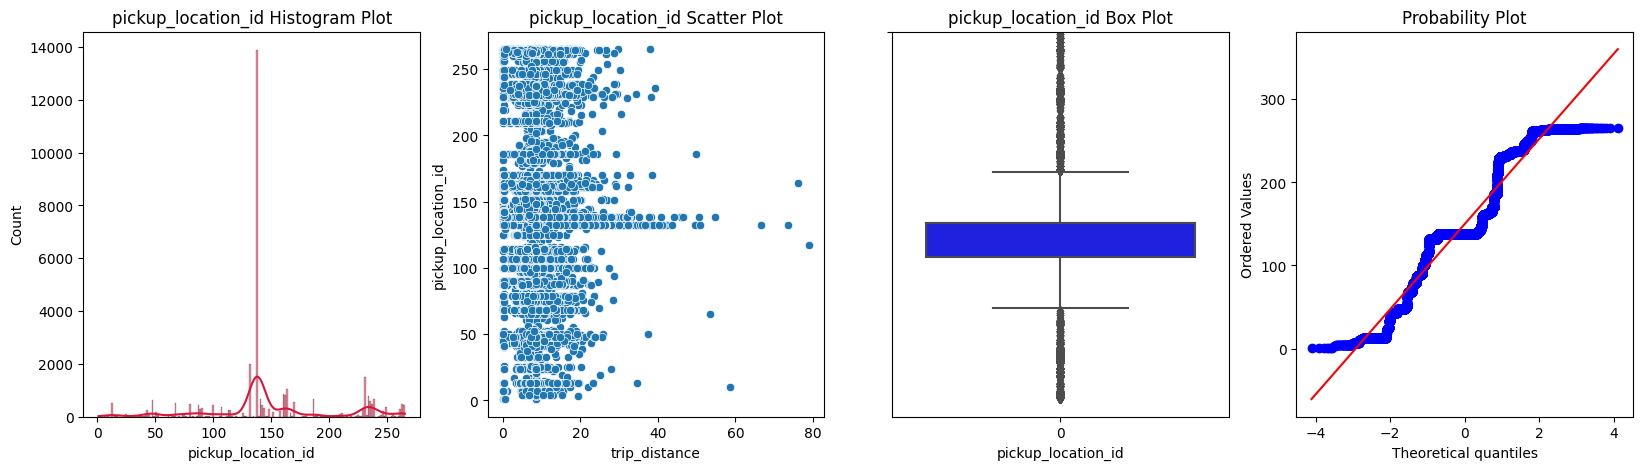

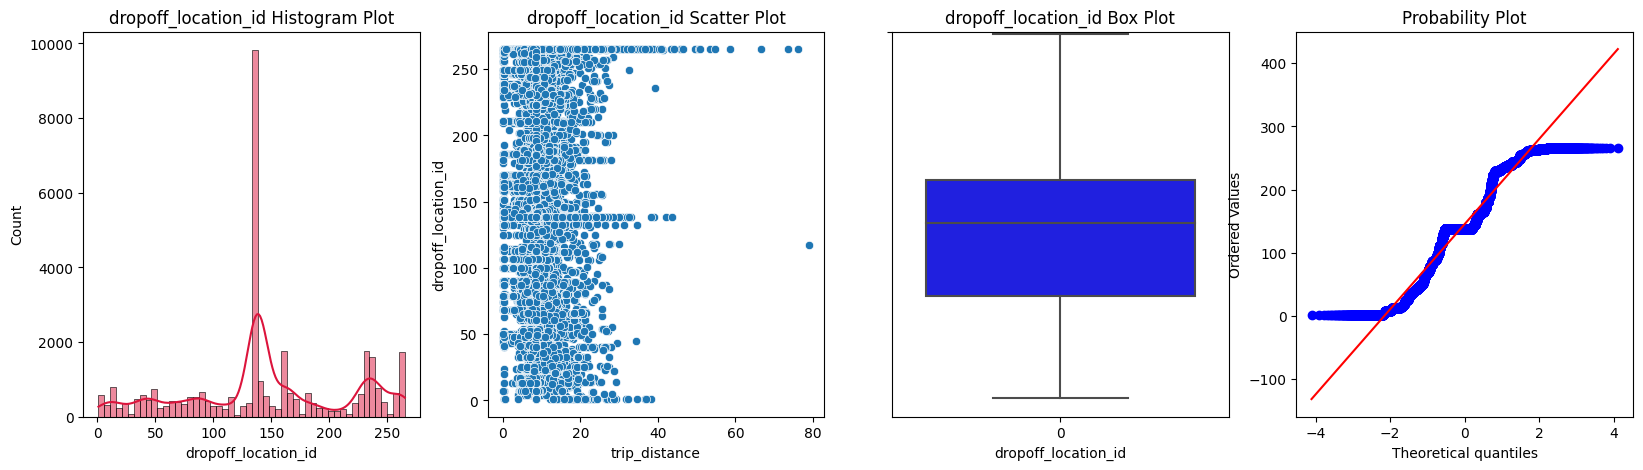

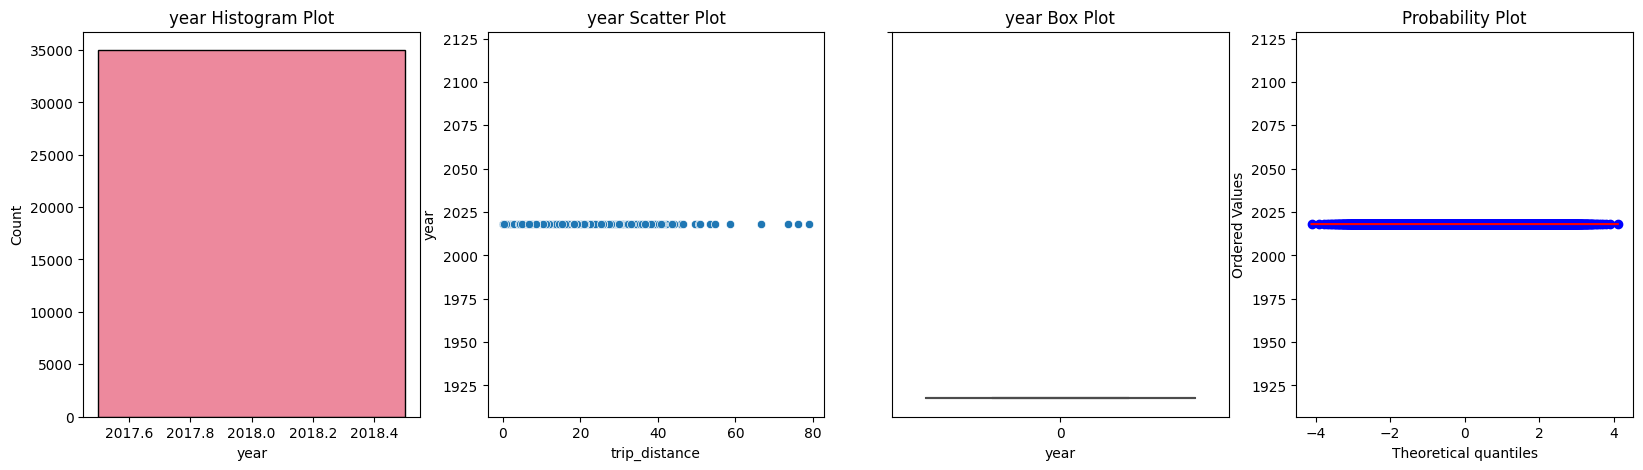

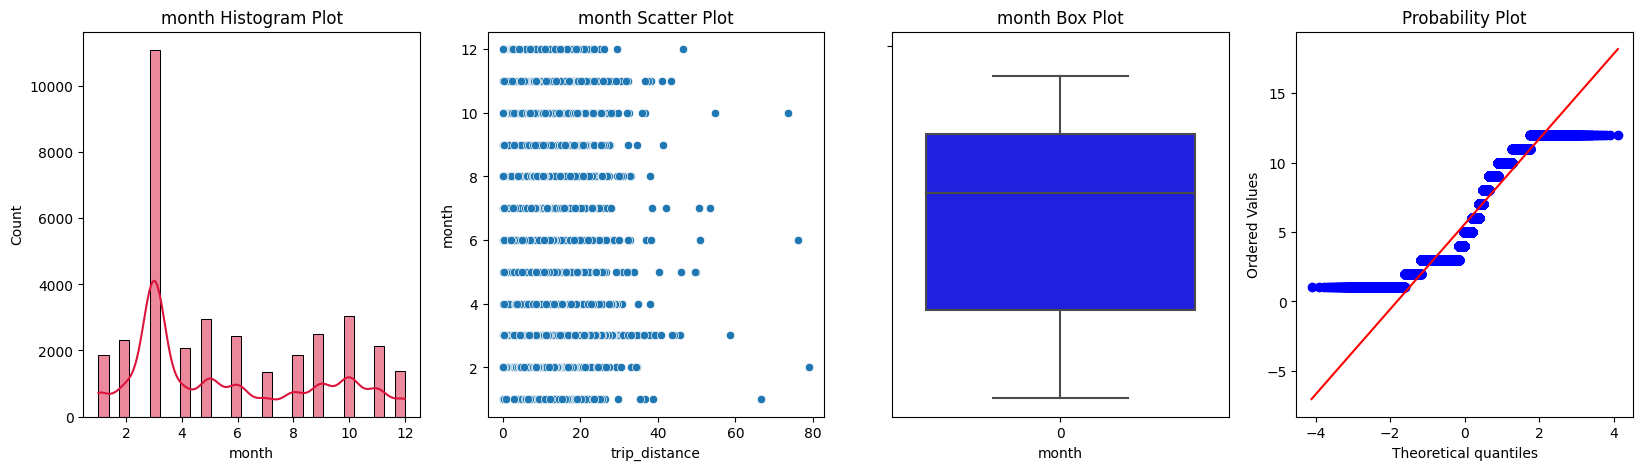

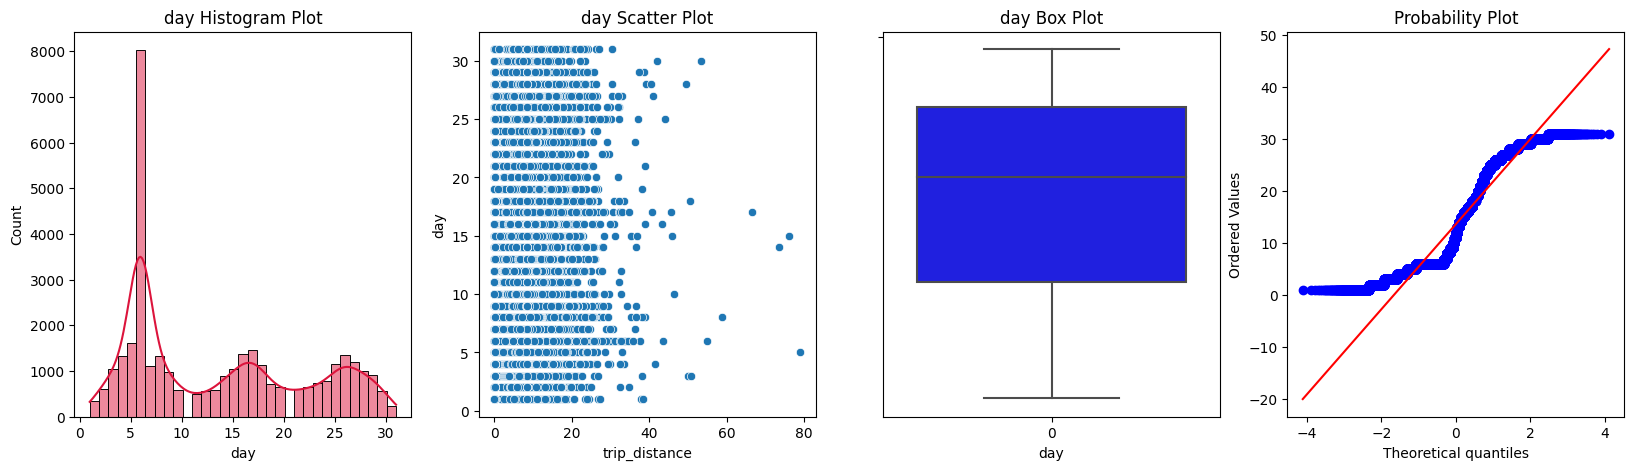

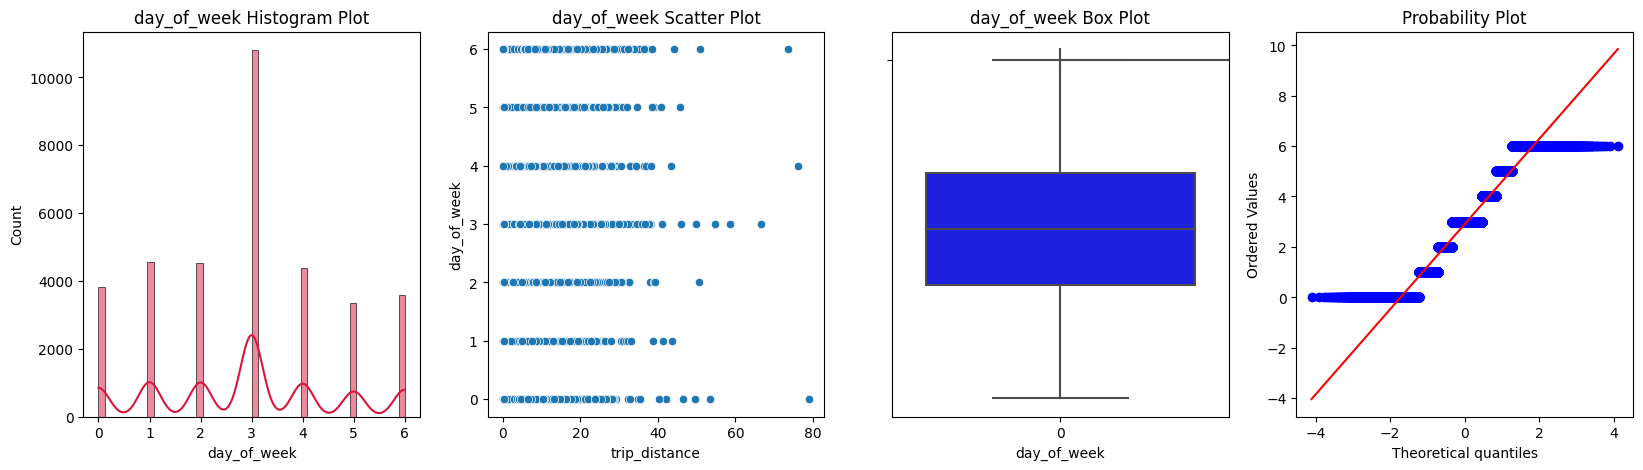

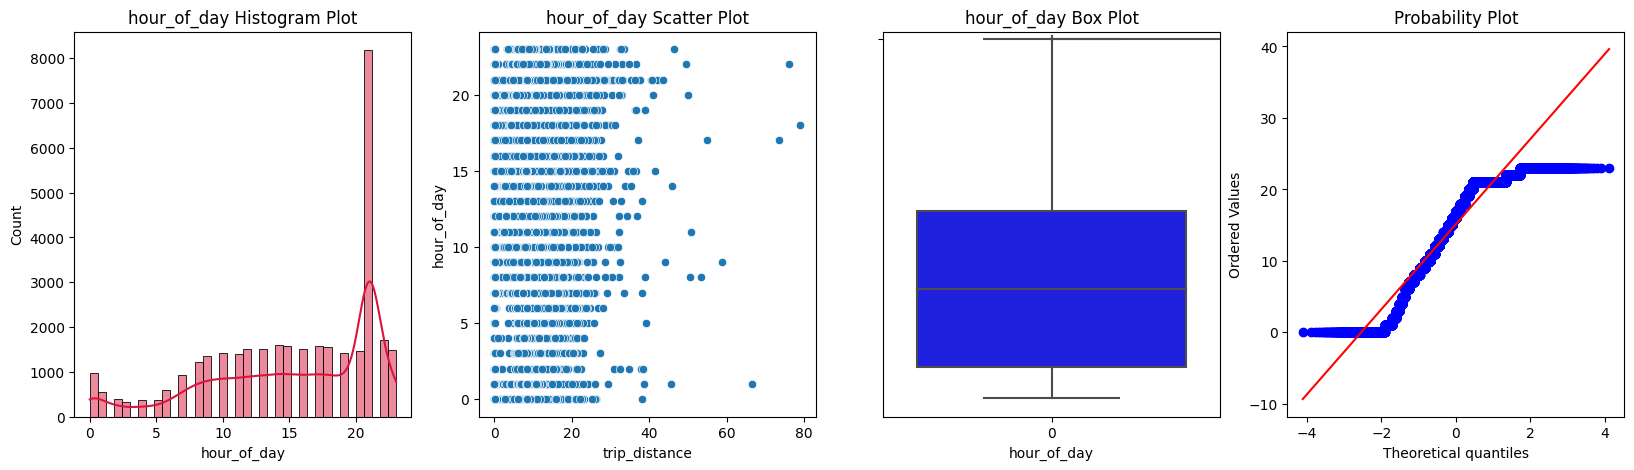

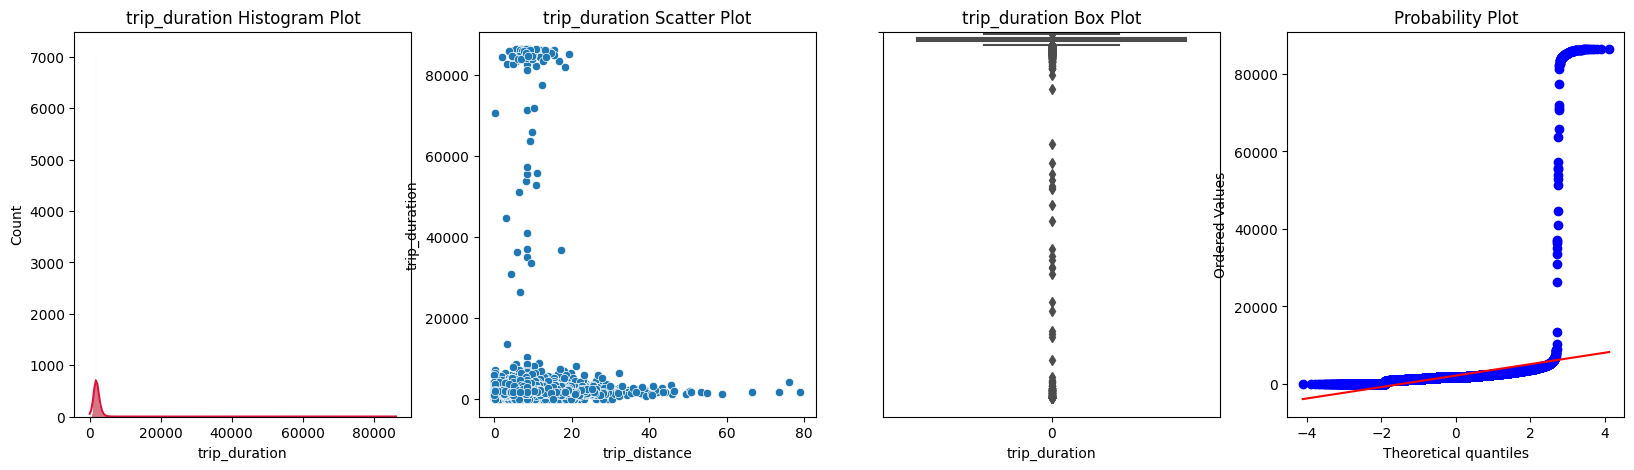

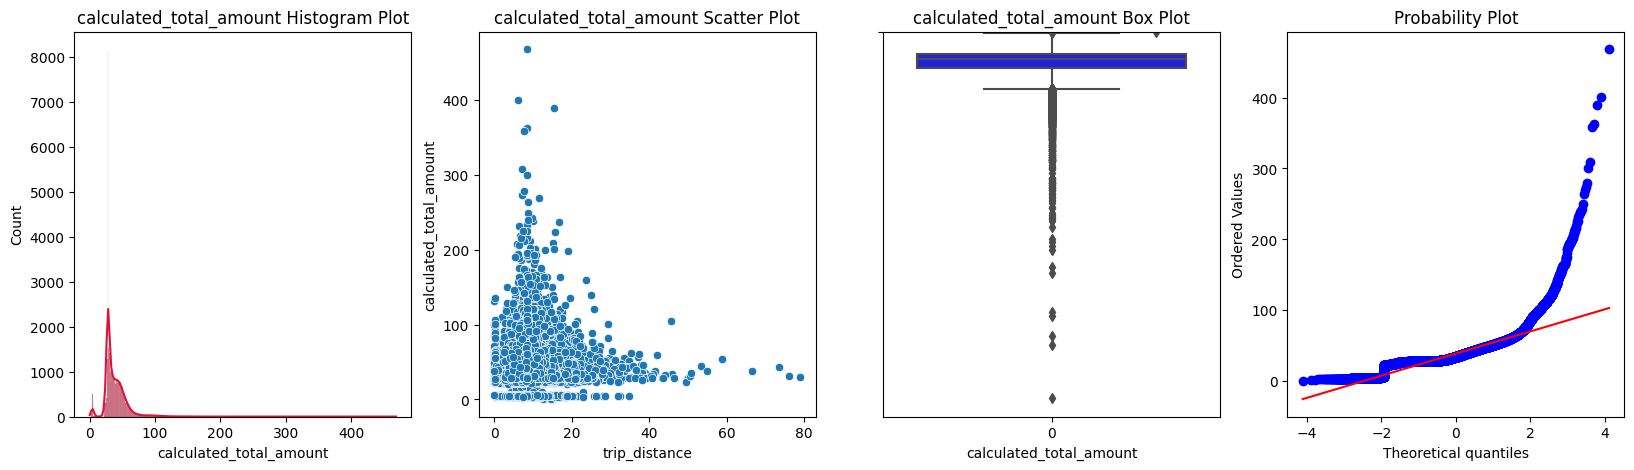

In [58]:
for element in train_df:
  i, j = 1,1
  plot.figure(figsize = (20,5))
  plot.subplot(i,4,j)
  sns.histplot(data = train_df, x = train_df[element], kde = True, color = 'crimson').set(title = ""+element+" Histogram Plot")
  j += 1

  plot.subplot(i,4,j)
  sns.scatterplot(data = train_df, x = 'trip_distance', y = element).set(title = ""+element+" Scatter Plot")
  j += 1

  plot.subplot(i,4,j)
  sns.boxplot(train_df, x = train_df[element], color = 'yellow').set(title = ""+element+" Box Plot")
  sns.boxplot(train_df[element], color = 'b')
  j += 1

  plot.subplot(i,4,j)
  sp.stats.probplot(train_df[element], plot = plot)
  plot.show()

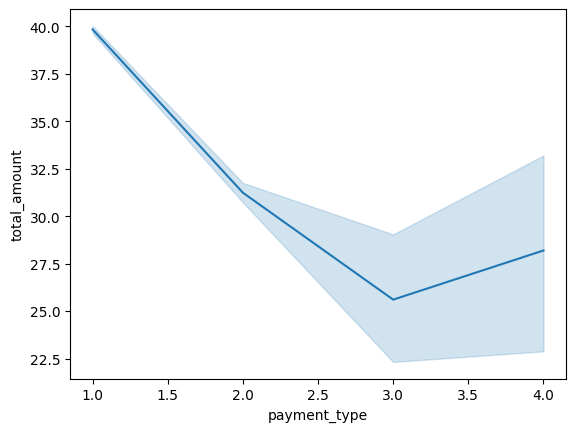

In [16]:
sns.lineplot(x="payment_type", y="total_amount", data=train_df)
plot.show()

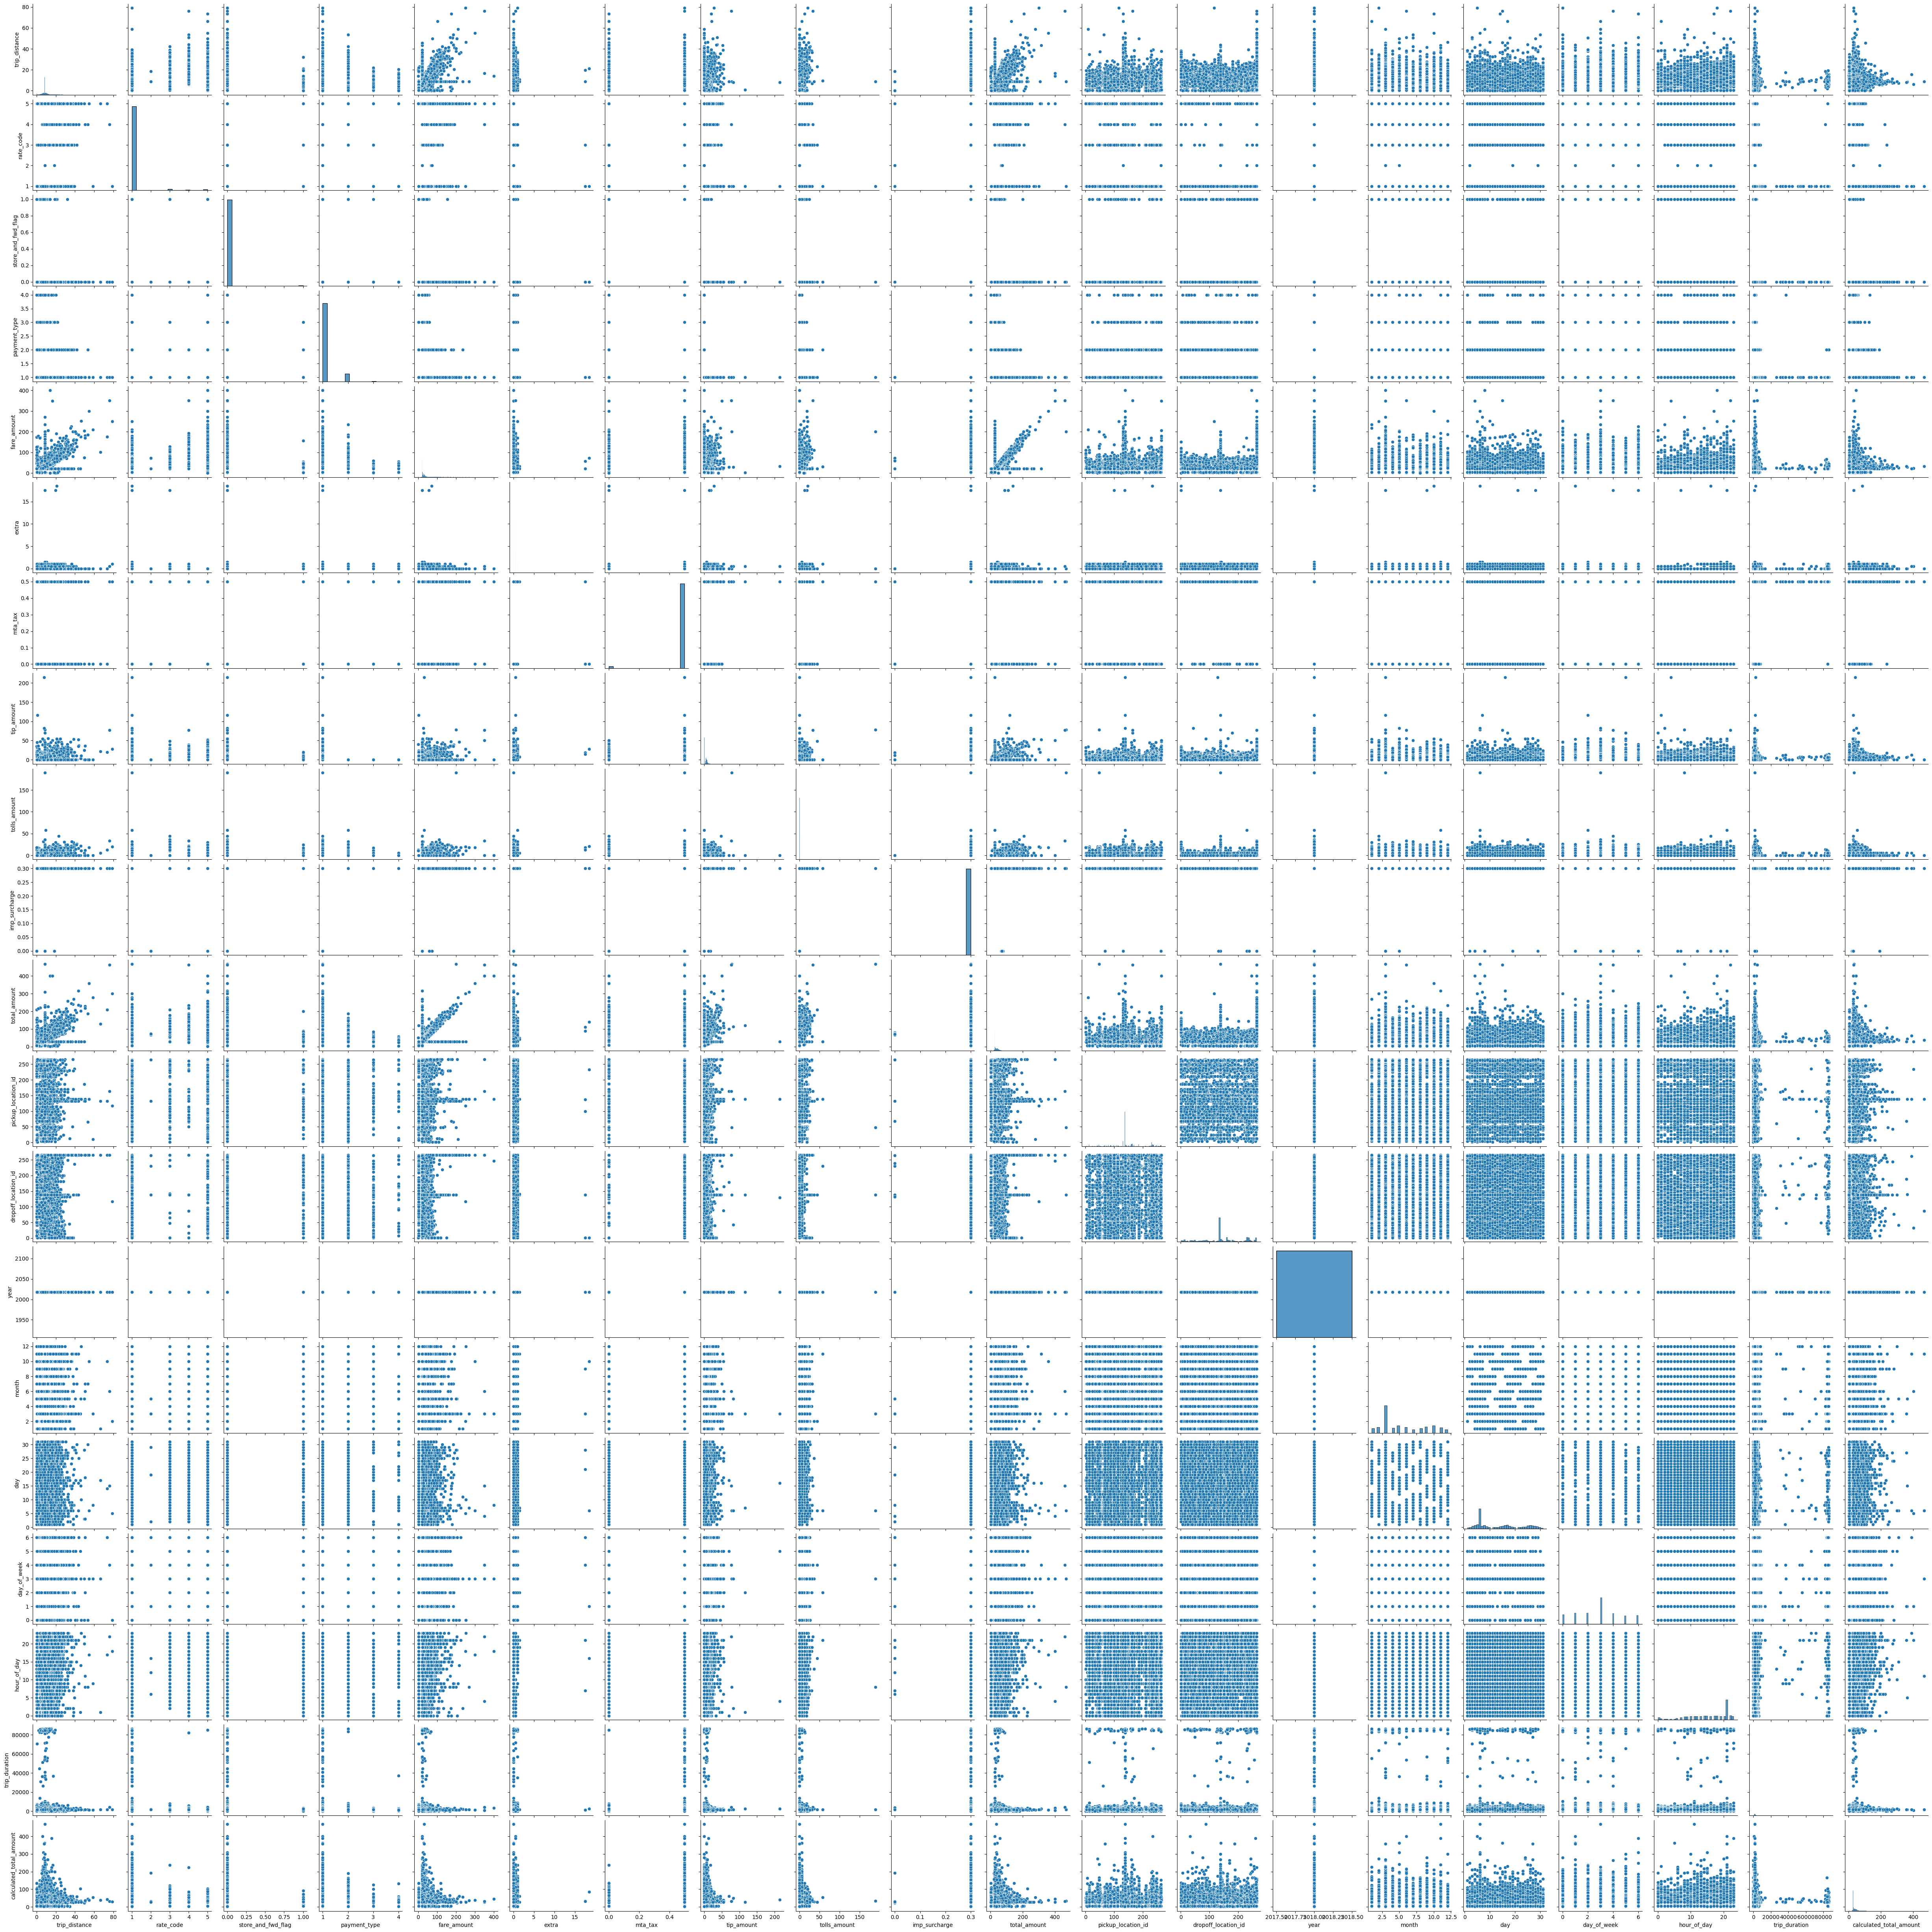

In [17]:
# Pair plots display pairwise relationships between variables in a dataset.
sns.pairplot(data = train_df)
plot.show()

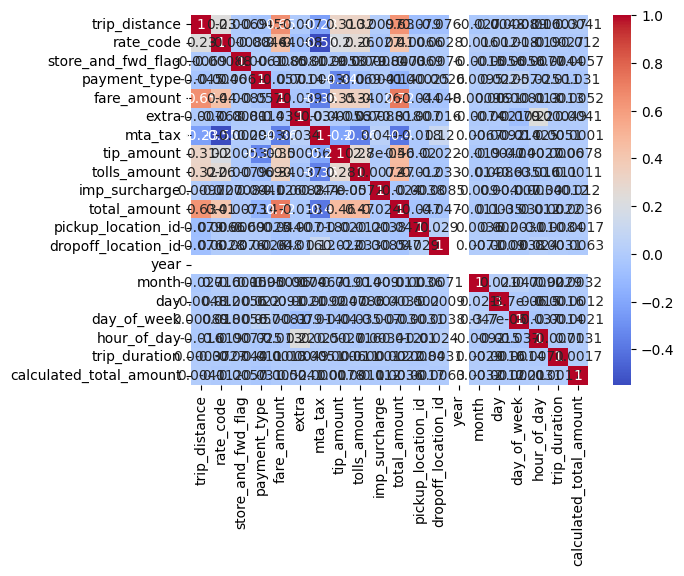

In [18]:
# Heatmaps are used to show the correlation between variables in a dataset.
sns.heatmap(train_df.corr(), annot=True, cmap="coolwarm")
plot.show()

#**Normalize and perform hypothesis testing on features of the dataset :-**

##**Normalizing :-**

In [113]:
# Removing the columns whose values are wrong and having negative values
columns_to_remove = ['store_and_fwd_flag', 'extra', 'mta_tax','tip_amount','tolls_amount','imp_surcharge','year','day_of_week','hour_of_day']
removed_df = train_df.drop(columns_to_remove, axis=1)

In [111]:
def compare(df):
  for element in df:
    i, j, k = 1,1,1
    plot.figure(figsize = (20,5))
    plot.subplot(i,4,j)
    sns.histplot(data = df, x = df[element], kde = True, color = 'crimson').set(title = ""+element+"Before normalizing Histogram Plot")
    j += 1

    plot.subplot(i,4,j)
    sns.scatterplot(data = df, x = 'trip_distance', y = element).set(title = ""+element+"Before normalizing Scatter Plot")
    j += 1

    plot.subplot(i,4,j)
    sns.boxplot(df, x = df[element], color = 'yellow').set(title = ""+element+"Before normalizing Box Plot")
    sns.boxplot(df[element], color = 'b')
    j += 1

    plot.subplot(i,4,j)
    sp.stats.probplot(df[element], plot = plot)
    plot.show()

    Boxcox_lambda = sp.stats.boxcox(df[element])
    lambda_value = Boxcox_lambda[1]
    df[element] = ((df[element] ** lambda_value) - 1)/ lambda_value

    plot.figure(figsize = (20,5))
    plot.subplot(i,4,k)
    sns.histplot(data = df, x = df[element], kde = True, color = 'crimson').set(title = ""+element+"After normalizing Histogram Plot")
    k += 1

    plot.subplot(i,4,k)
    sns.scatterplot(data = df, x = 'trip_distance', y = element).set(title = ""+element+"After normalizing Scatter Plot")
    k += 1

    plot.subplot(i,4,k)
    sns.boxplot(df, x = df[element], color = 'yellow').set(title = ""+element+"After normalizing Box Plot")
    sns.boxplot(df[element], color = 'b')
    k += 1

    plot.subplot(i,4,k)
    sp.stats.probplot(df[element], plot = plot)
    plot.show()

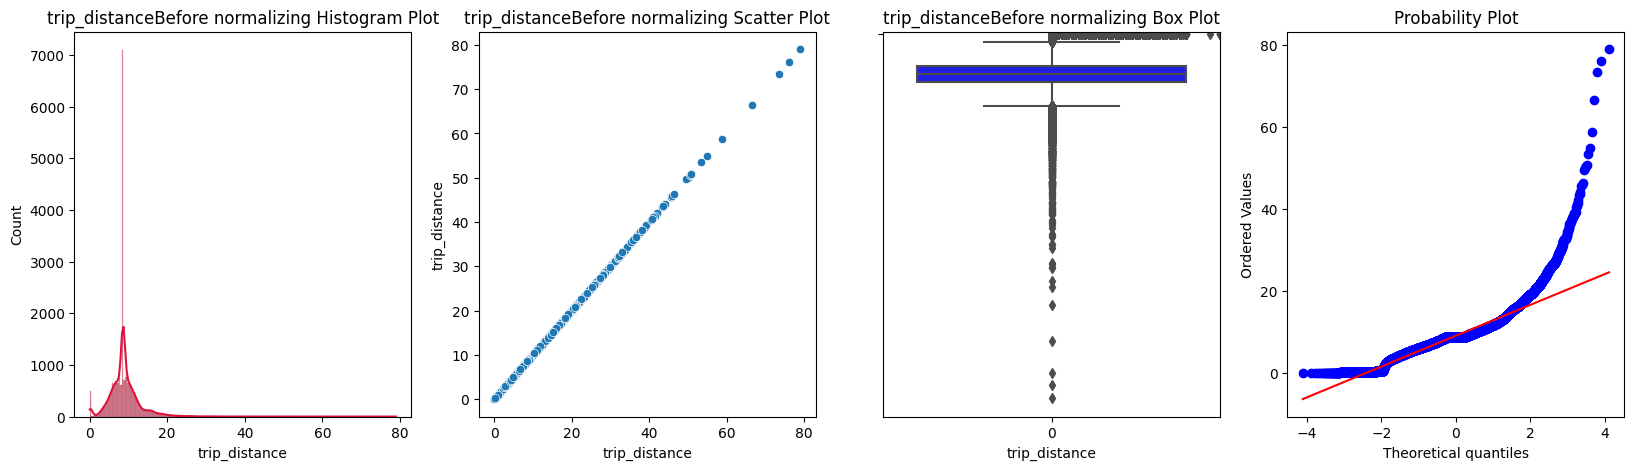

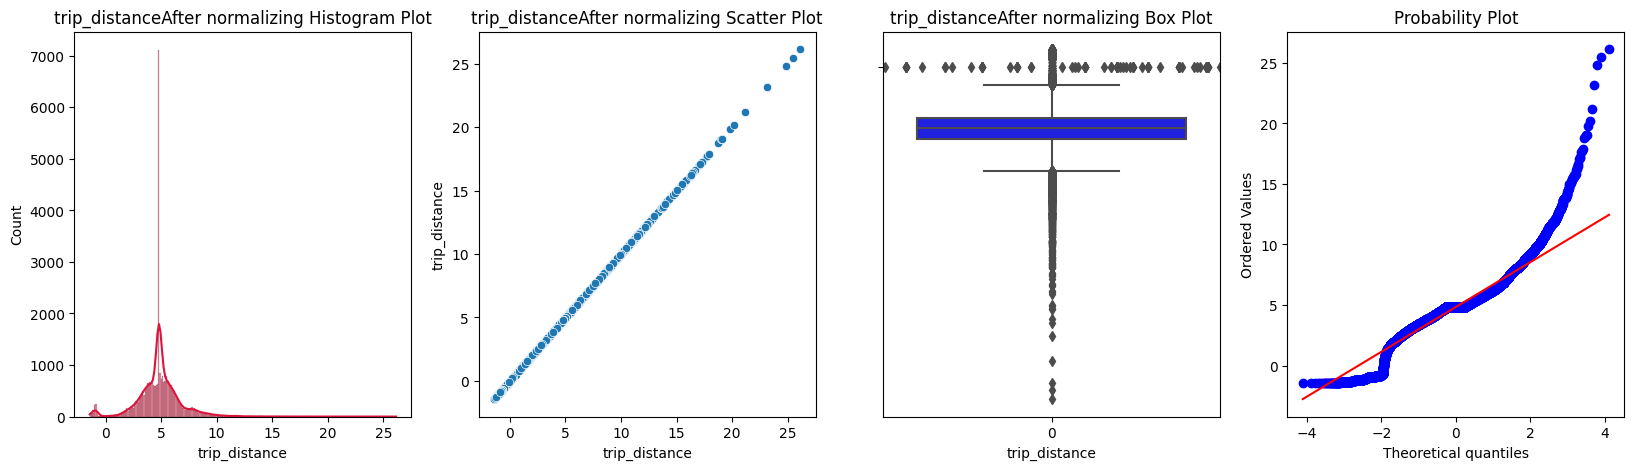

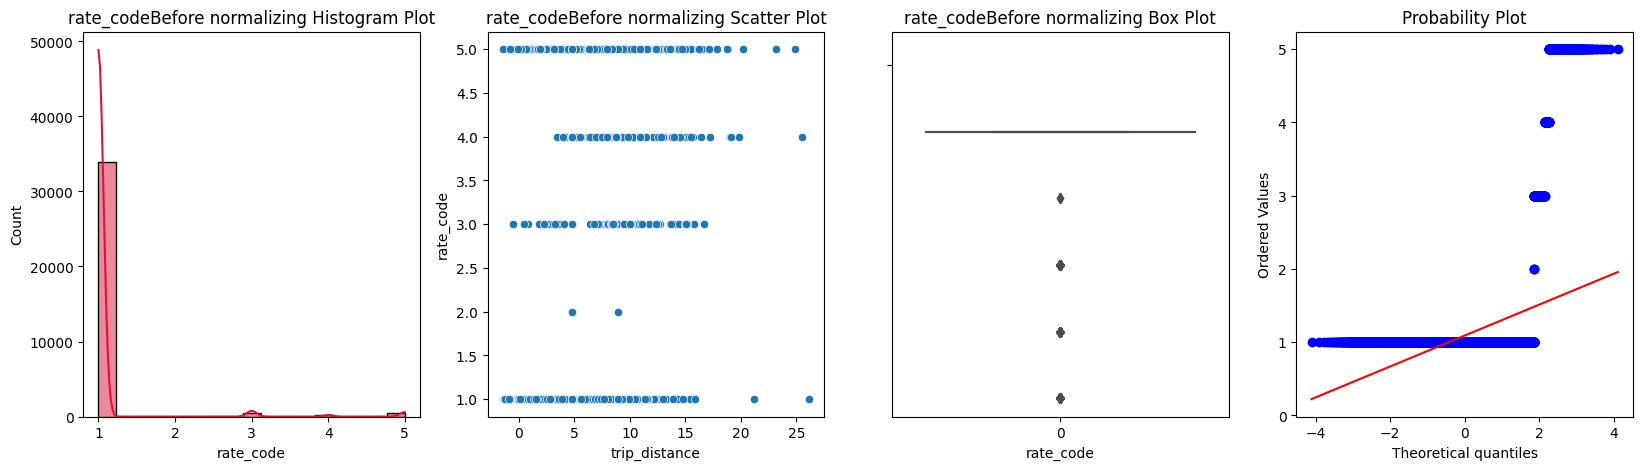

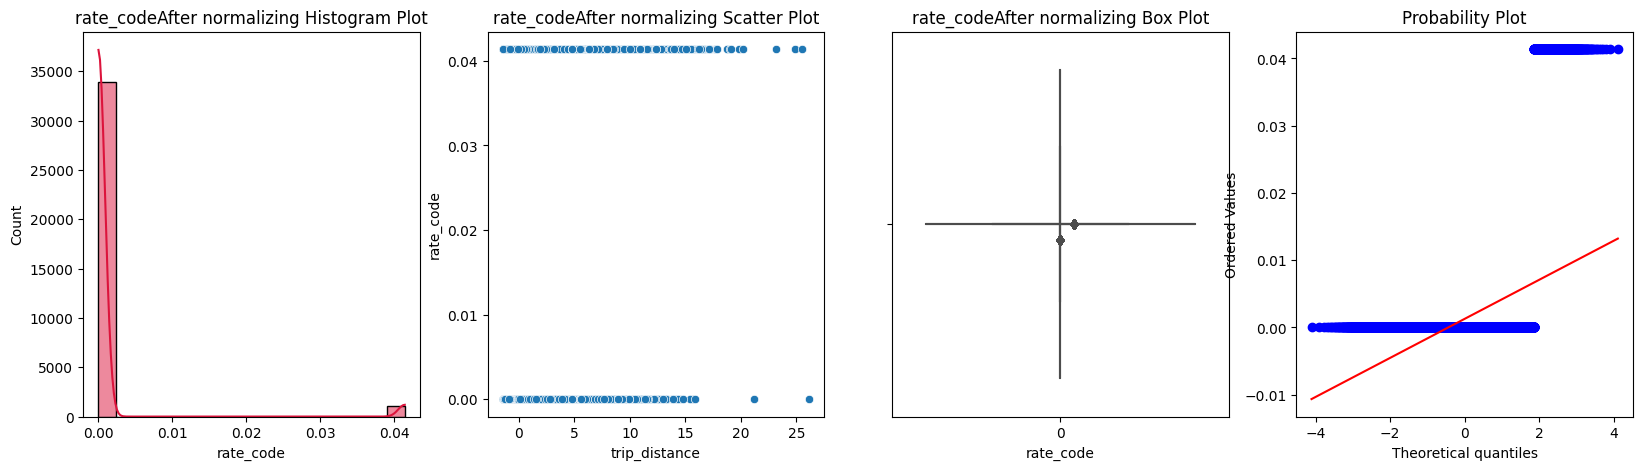

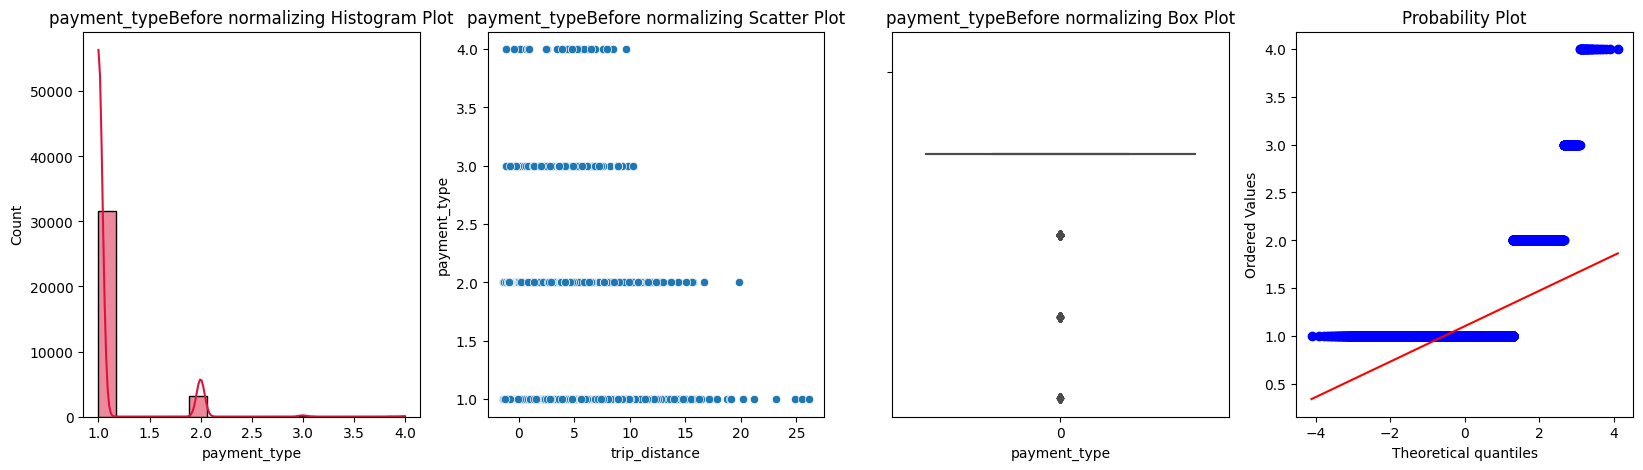

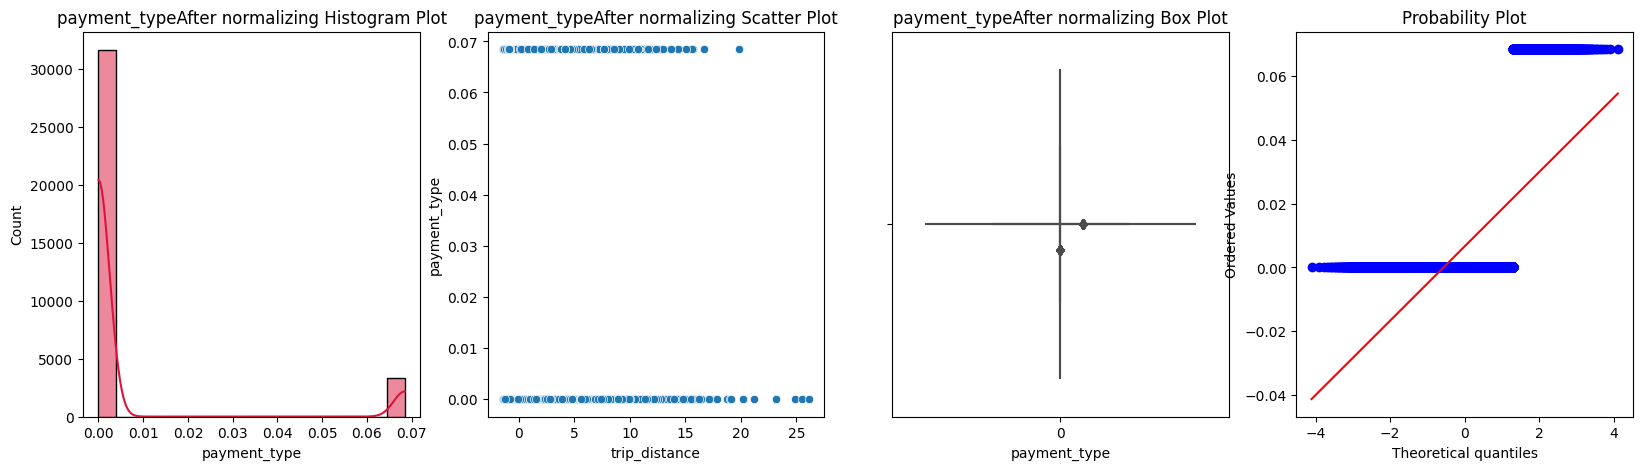

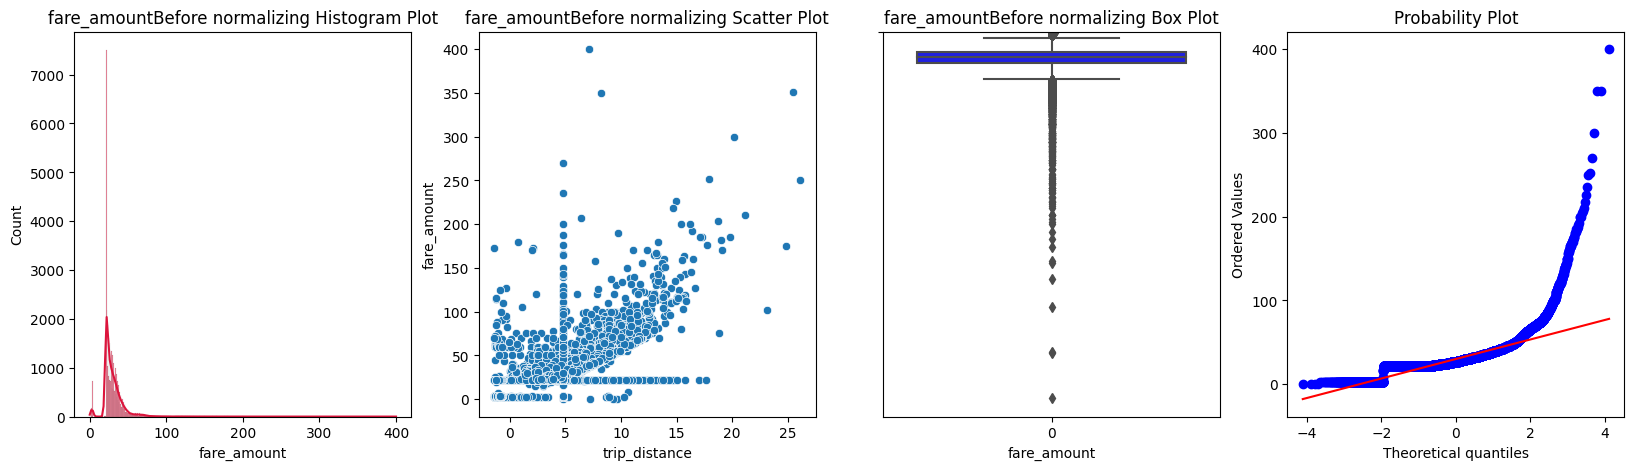

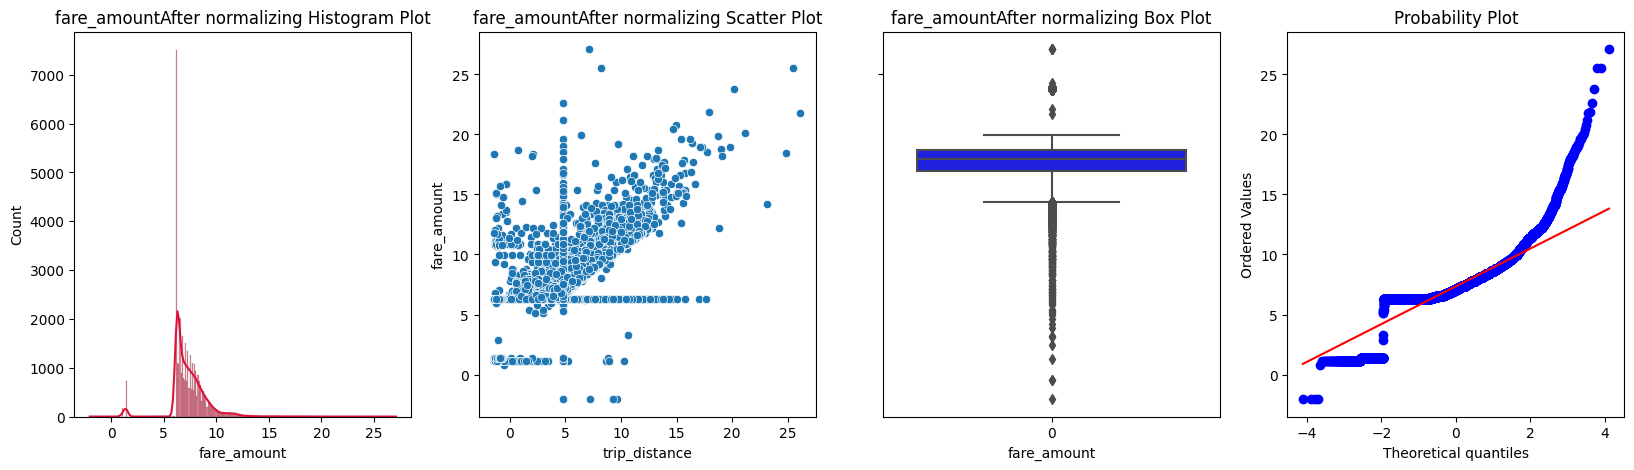

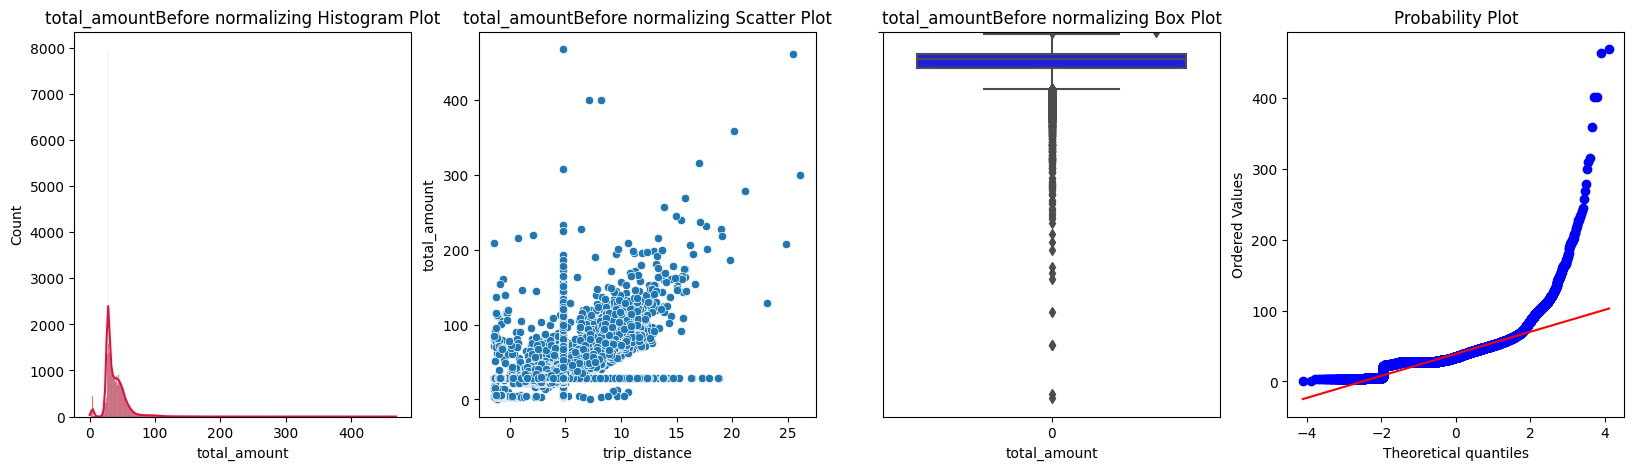

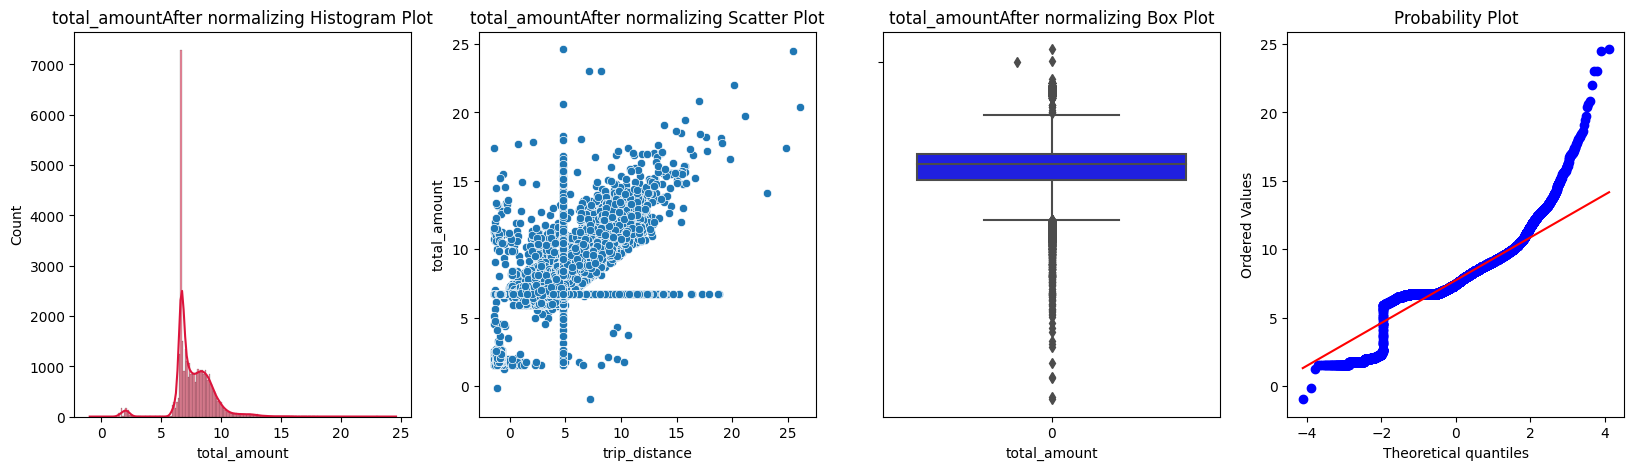

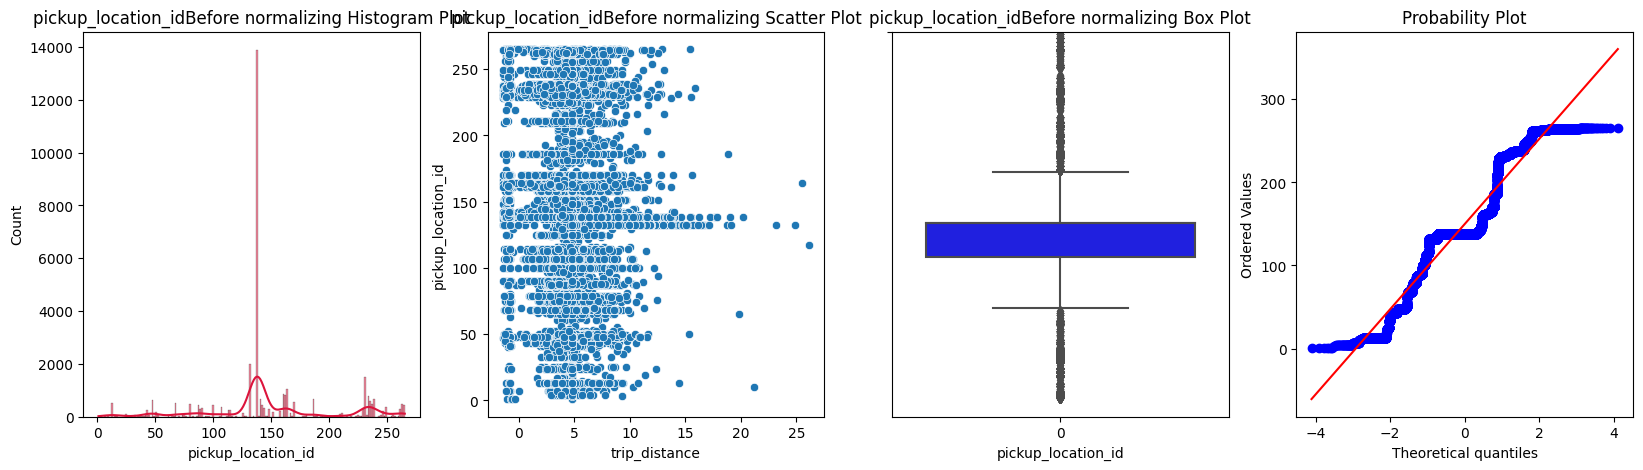

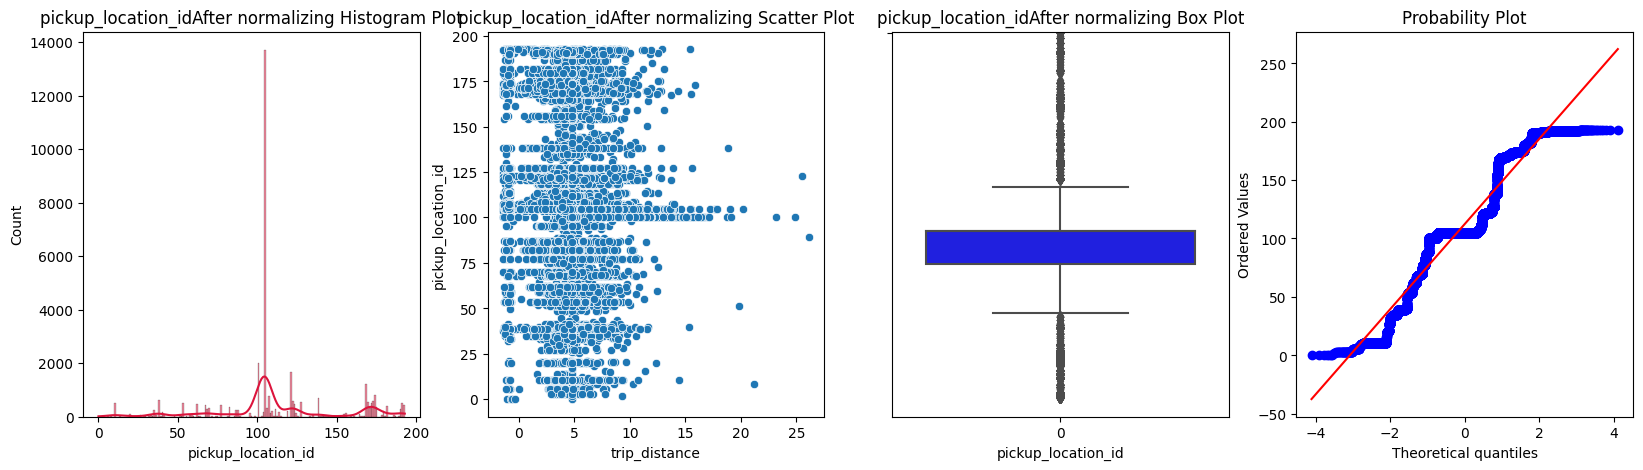

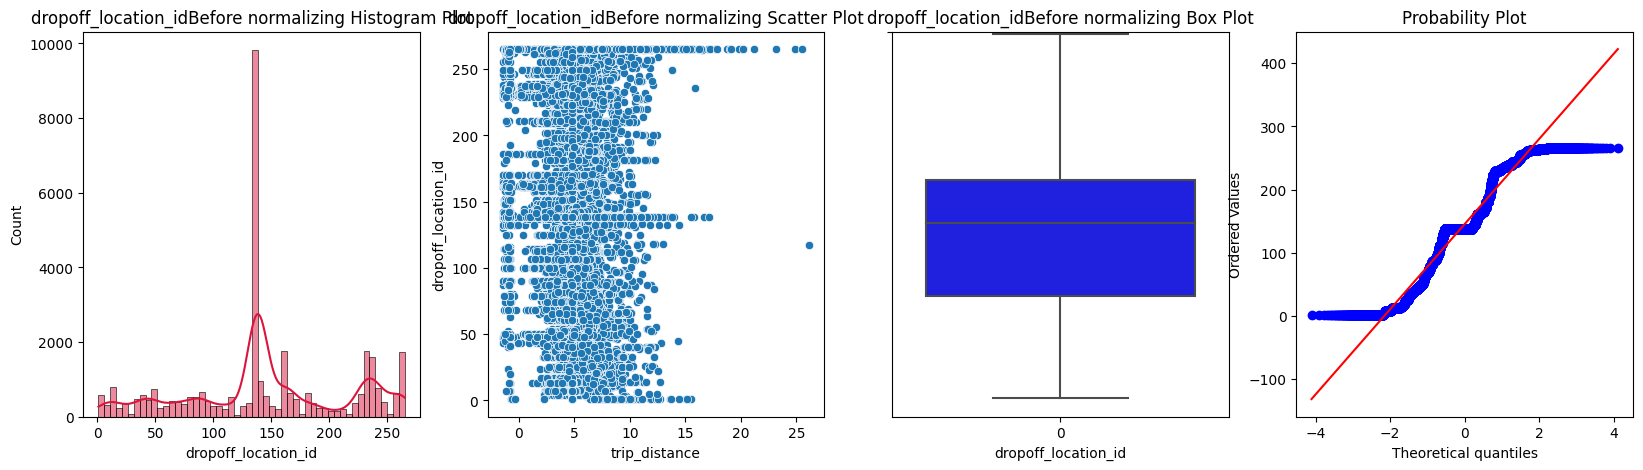

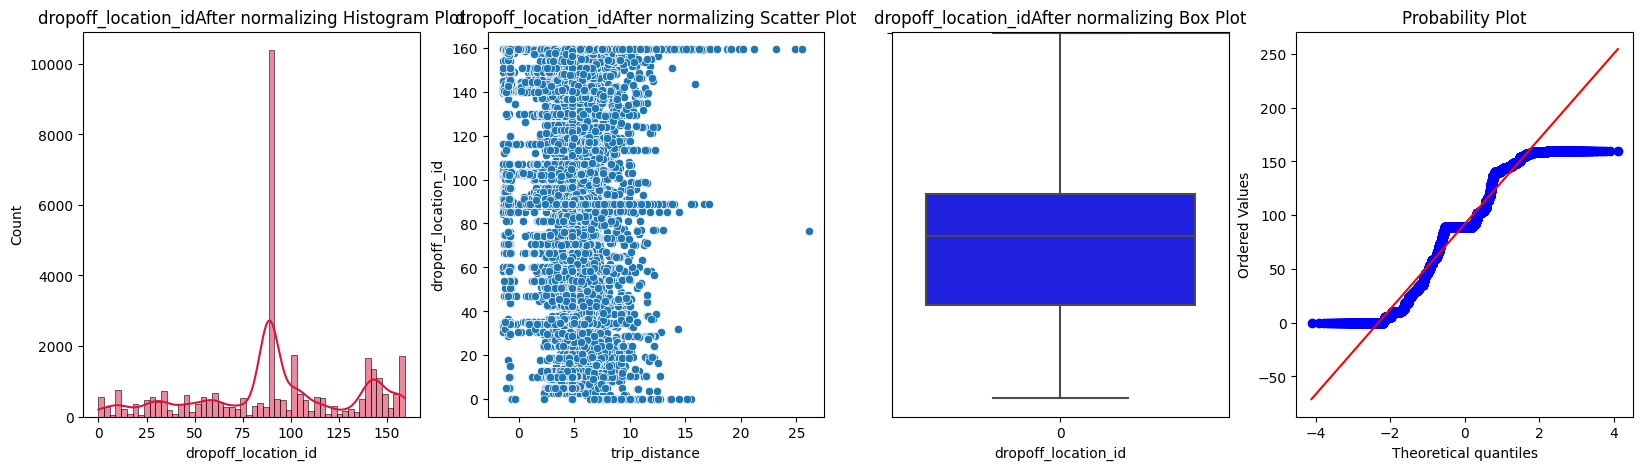

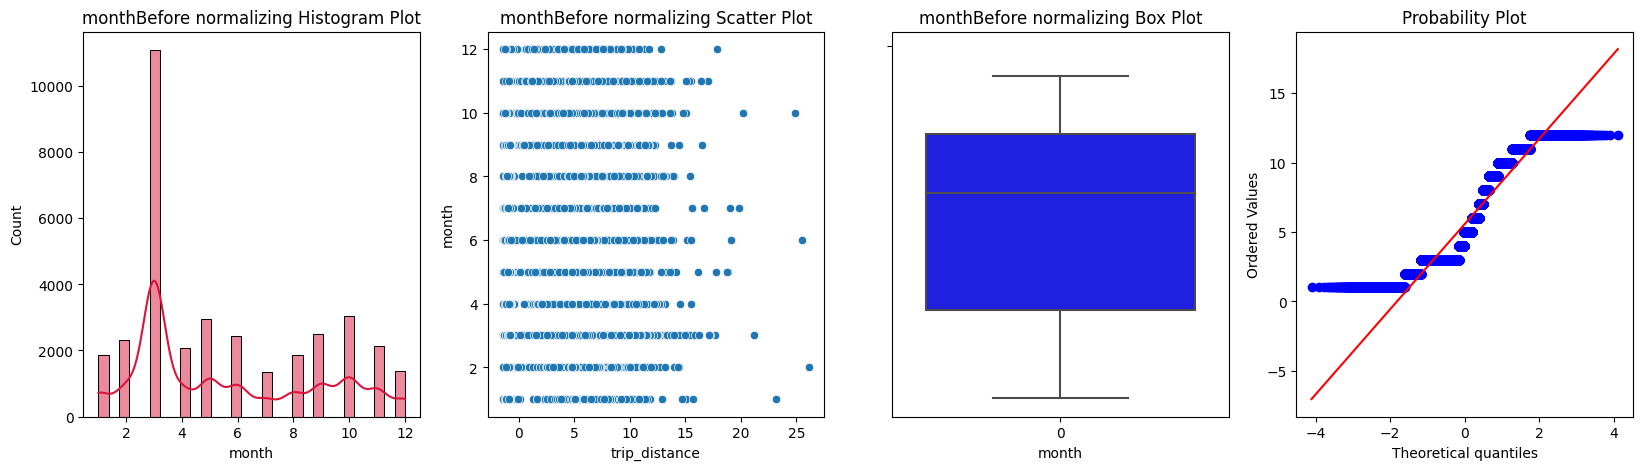

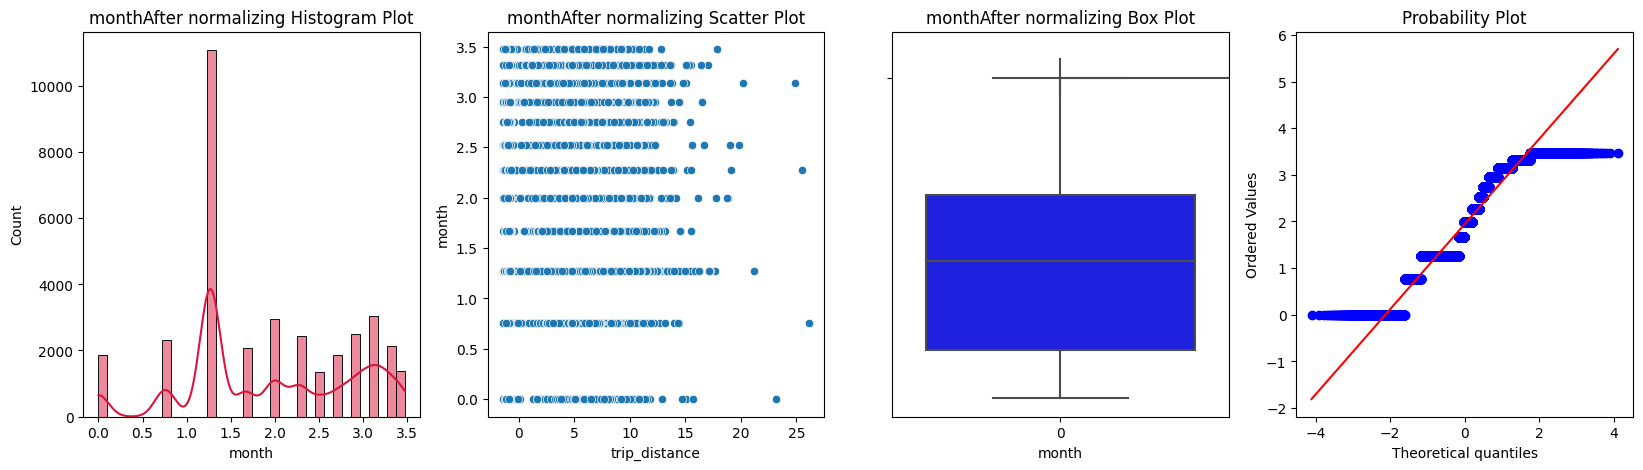

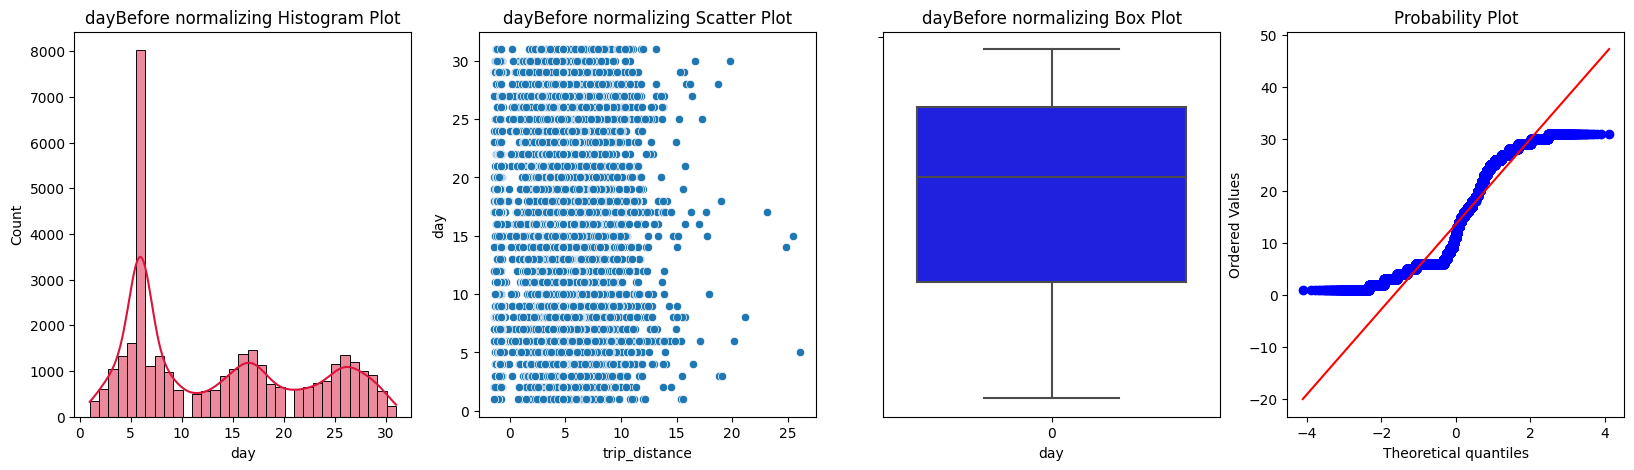

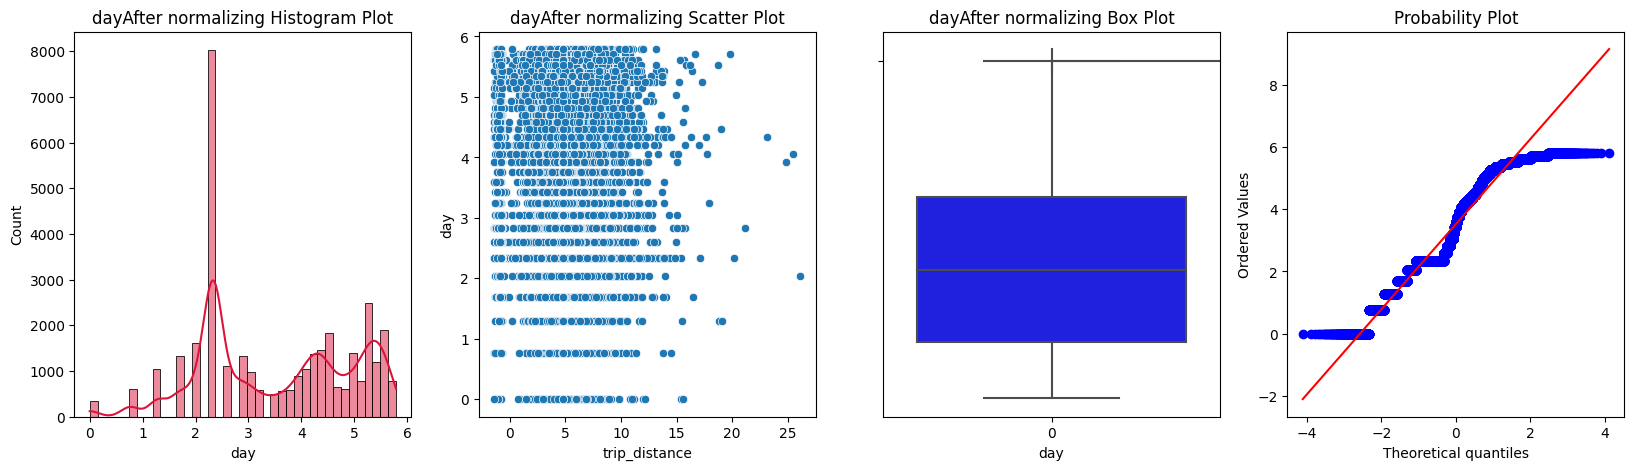

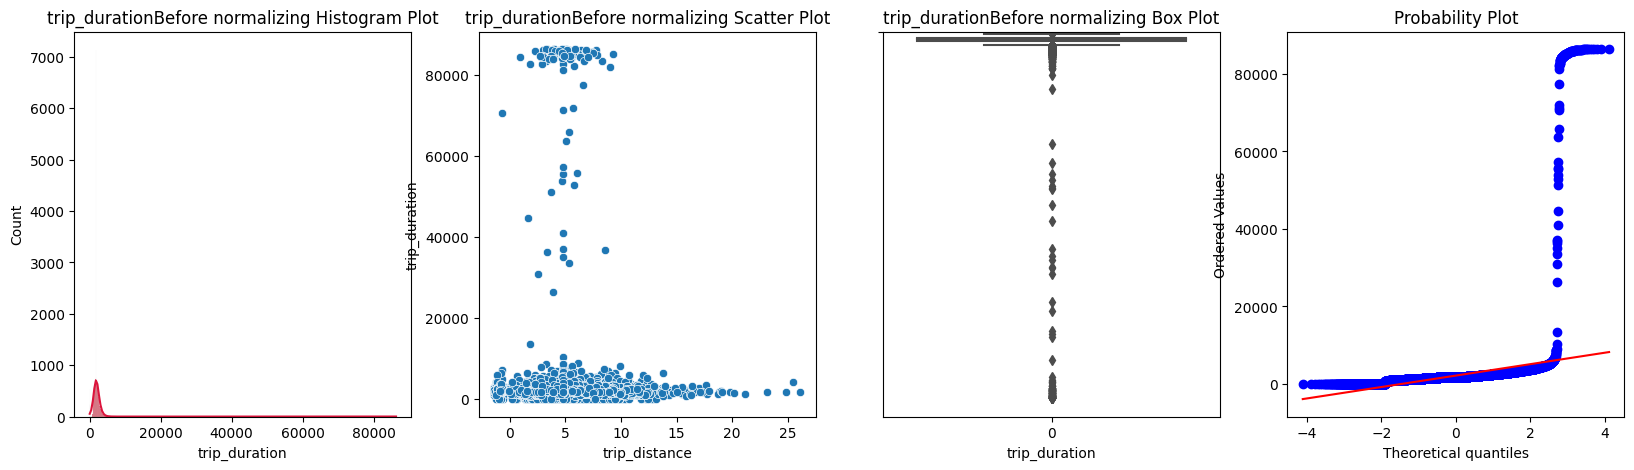

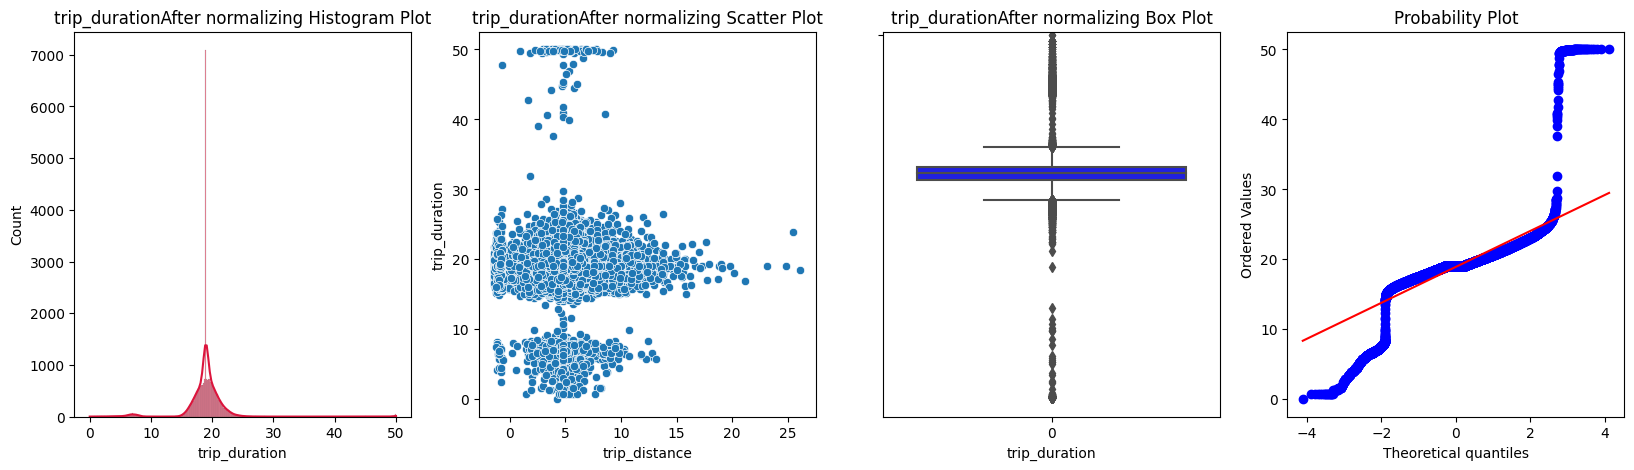

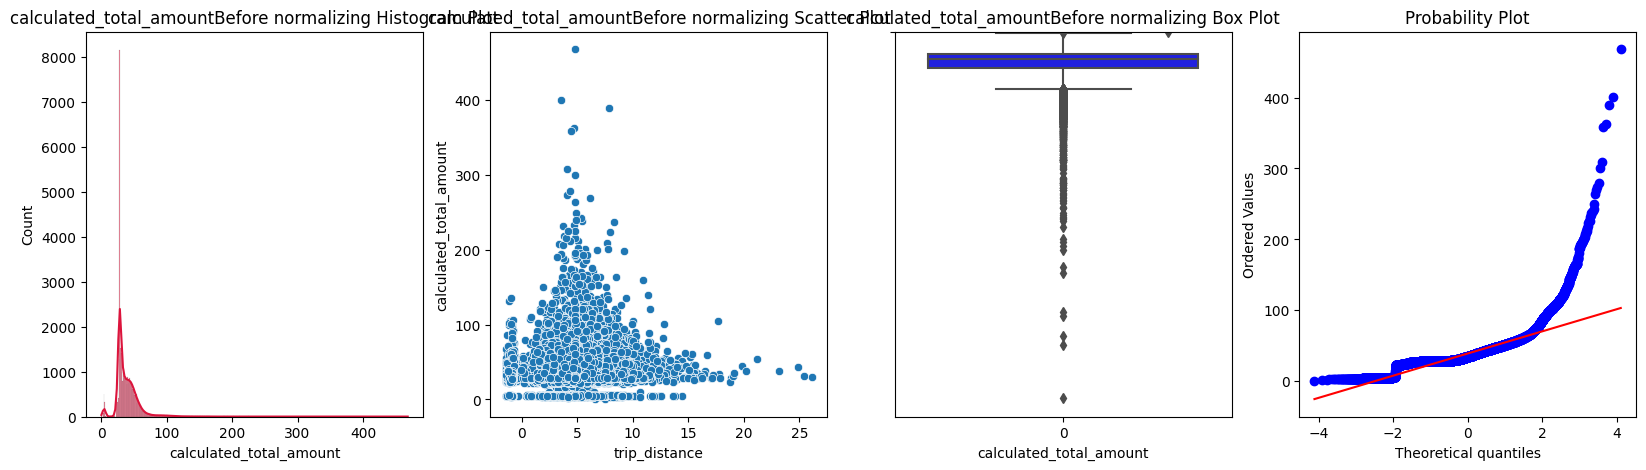

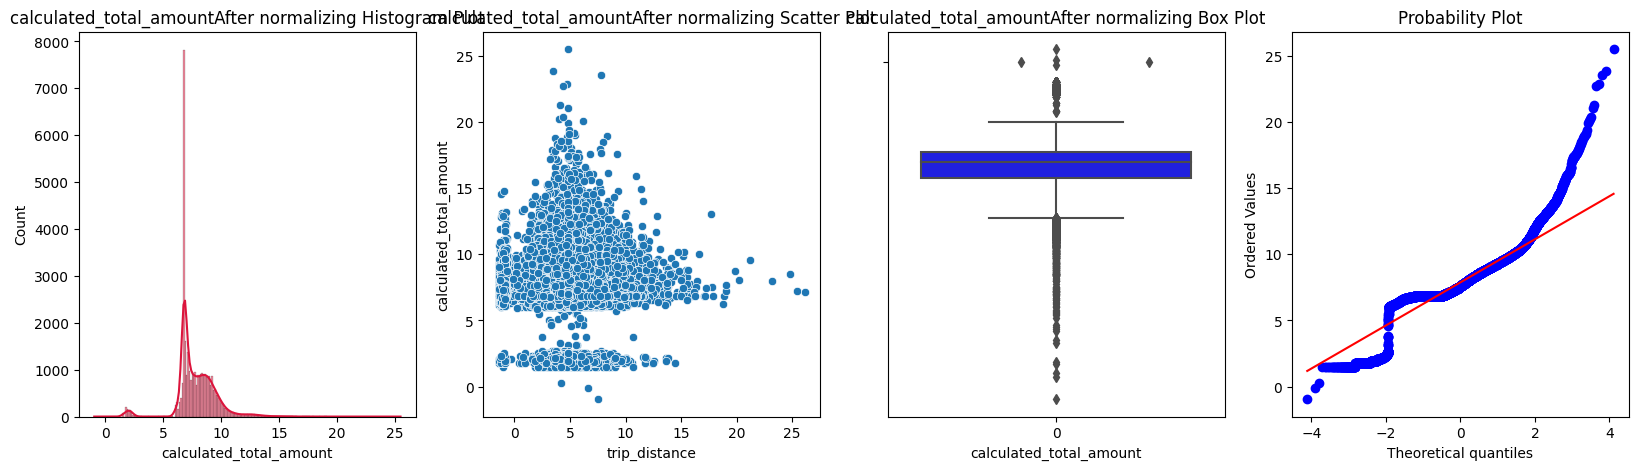

In [114]:
compare(removed_df)

##**Hypothesis Testing :-**

##**Test the Hypothesis for The feature Trip_distance.**
#**H0: μ = 10 miles vs H1: μ != 10 miles**
* **level of significance α = 5%**


In [116]:
# function for sigma being not known.
def func_sigma_not_known(func_data, func_alpha, func_mu_not):
  if(len(func_data) > 25):
    # sigma_2 = np.std(func_data)**2
    z_cal = (np.mean(func_data) - func_mu_not)/(np.std(func_data)/np.sqrt(len(func_data)))
    p_val = 2 *(1 - sp.stats.norm.cdf(np.abs(z_cal)))
    if p_val < func_alpha:
      print("Reject H0")
    else:
      print("Donot reject H0")
  else:
    print("sairam")
    t_cal = (np.mean(func_data) - func_mu_not)/(np.std(func_data)/np.sqrt(len(func_data)))
    t_val = 2 * (1 - sp.stats.t.cdf(np.abs(t_cal),len(func_data)-1))
    print(t_cal,t_val)
    if t_val < func_alpha:
      print("Reject H0")
    else:
      print("Donot reject H0")

In [129]:
train_df['trip_distance'].describe()

count    35000.000000
mean         9.002194
std          4.051970
min          0.010000
25%          6.950000
50%          8.600000
75%         10.400000
max         79.010000
Name: trip_distance, dtype: float64

In [130]:
func_sigma_not_known(train_df['trip_distance'],0.05,9)

Donot reject H0
